In [1]:
from random import randint
import numpy as np
from tqdm.notebook import tqdm

## La fonction d'évaluation

In [2]:
def evaluate(job,order):
    ordered_job = [job[i] for i in order]
    start_work_time =[[]]
    end_work_time = [[]]
    cmp = 0
    # intilialisation of the thingy (this it just the first one when he starts / finishes)
    for i in ordered_job[0]:
        cmp += i
        start_work_time[0].append(cmp-i)
        end_work_time[0].append(cmp)
    # The real thing   
    for i,j in enumerate(ordered_job):
        if i != 0:
            start_work_time.append([])
            end_work_time.append([])
            for k,l in enumerate(j):
                if k == 0:
                    start_work_time[i].append(end_work_time[i-1][k])
                else:
                    start_work_time[i].append(max(end_work_time[i-1][k],end_work_time[i][k-1]))
                end_work_time[i].append(start_work_time[i][k]+l)
    return(end_work_time[len(end_work_time)-1][len(end_work_time[0])-1])

## Lire le fichier
I'm not using this btw

In [3]:
numbers_list = []
with open('../tai20_5.txt', 'r') as file:
    for line in file:
        numbers = line.strip().split()
        if numbers:
            try:
                numbers = [float(num) for num in numbers]
                numbers_list.extend(numbers)
            except ValueError:
                pass
# Here we delete the stupid informations about upper and lower bound and stuff, for now I won't be suing them
for i in range(0, 1050, 100):
    del numbers_list[i:i+5]
# now we split
split = [numbers_list[i:i+100] for i in range(0, 1000, 100)]
# decoupe en 10 lists of 5 lists of 20
divided_lists = [[sublist[i:i+20] for i in range(0, 100, 20)] for sublist in split]

In [4]:
job_1 = [[row[i] for row in divided_lists[0]] for i in range(len(divided_lists[0][0]))]

In [5]:
evaluate(job_1,[i for i in range(20)])

1448.0

La premiere fonction qui change la solution

In [6]:
def Echange_dordre(solution, i, j):
    order = solution.copy()
    order[solution.index(i)], order[solution.index(j)] = order[solution.index(j)], order[solution.index(i)]
    return order

Swap: 

Input: solution, 1st_job, 2nd_job

Output: Solution with 1st_job and 2nd_job ordr swaped

In [7]:
def insertion(order,i,j):
    if order[i]<j:
        for k in range(len(order)):
            if order[k] <= j and order[k] > order[i] and k != i:
                order[k]-=1
    elif order[i]>j:
        for k in range(len(order)):
            if order[k] >= j and order[k] < order[i] and k != i:
                order[k]+=1
    order[i]=j
    return order

In [8]:
def choose_neighbourhood(solution,neighbors):
    for i in range(len(solution)-1):
        neighbors.append(Echange_dordre(solution,i,i+1))
        neighbors.append(Echange_dordre(solution,randint(0,len(solution)-1),randint(0,len(solution)-1)))
    return None

## Pour les critères d'arrêts:
On a opté pour un nombre maximal nMax d’itérations fixé au préalable comme vue en cours<br>
un nombre maximal d’itérations sans améliorer la meilleure solution (stagnation) boff je n'ai pas beaucoup aimé<br>
Le min entre les 2 non plus<br>
Et quand V(s) – T = Ø, Bain c'est casi impossible 

## Pour la liste tabou:
On a opté pour la liste tabou explicite
car elle est simple à implaimenté

In [29]:
def tabu_search(job,initial_solution, num_iterations, tabu_list_size):
    # initialisation
    current_solution = initial_solution
    tabu_list = []
    best_solution = current_solution
    best_score = evaluate(job,best_solution)

    # itération 
    for iter in tqdm(range(num_iterations)):
        # Nouvelle solution voisine 
        neighbors=[]
        choose_neighbourhood(current_solution,neighbors)
        #Evaluate each neighbor and select the best one that is not in the tabu list
        best_neighbor = None
        best_neighbor_score = 100000
        
        for neighbor in neighbors:
            neighbor_score = evaluate(job, neighbor)
            if neighbor_score < best_neighbor_score and not any(np.array_equal(neighbor, tabu) for tabu in tabu_list):
                best_neighbor = neighbor
                #print("hi mom",best_neighbor)
                best_neighbor_score = neighbor_score
                
        # Mise à jour de la liste
        tabu_list.append(best_neighbor)
        if len(tabu_list) > tabu_list_size:
            tabu_list.pop(0)
        # Set the current solution to the best neighbor
        current_solution = best_neighbor

        # If the best neighbor is better than the current best solution, update the best solution
        if best_neighbor_score < best_score:
            best_itr = iter
            best_solution = best_neighbor
            best_score = best_neighbor_score

    return best_solution, best_score, best_itr

In [10]:
best_solution, best_score ,nbr_diteration = tabu_search(job_1,[i for i in range(0,20)], num_iterations=500, tabu_list_size=1000)

  0%|          | 0/500 [00:00<?, ?it/s]

In [11]:
print("nombre d'itération pour trouver la meilleur solution:",nbr_diteration)
print("Cmax=",best_score)
print("La meilleur solution",best_solution)

nombre d'itération pour trouver la meilleur solution: 32
Cmax= 1297.0
La meilleur solution [2, 13, 8, 3, 5, 1, 6, 7, 16, 4, 11, 10, 12, 14, 0, 18, 17, 15, 9, 19]


In [12]:
best_solution

[2, 13, 8, 3, 5, 1, 6, 7, 16, 4, 11, 10, 12, 14, 0, 18, 17, 15, 9, 19]

### Lecture du fichier

In [13]:
def get_data(filename, i,nb):
    nb = nb + 3
    with open(filename, 'r') as f:
        data = f.read()
    lines = data.split('\n')
    data = lines[i*nb:(i+1)*nb][3:]
    data = [x.split() for x in data]
    data = [[int(y) for y in x] for x in data]
    data = list(map(list, zip(*data)))

    nb_jobs     = int(lines[i*nb:(i+1)*nb][1].split()[0])
    nb_machines = int(lines[i*nb:(i+1)*nb][1].split()[1])
    upper_bound = int(lines[i*nb:(i+1)*nb][1].split()[3])
    lower_bound = int(lines[i*nb:(i+1)*nb][1].split()[4])

    data = np.array(data).T
    return nb_jobs, nb_machines, upper_bound, lower_bound, data

## Instance de Tailalrd 20_5 avec initialisaton aléatoire

In [14]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai20_5.txt",i,5)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,20)], num_iterations=1000, tabu_list_size=100)
    print("Pour la ",i+1,"eme instance de Tailler 20 travaille 5 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,",upperbound = ",ub, ",lowerbound = ",lb, "divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [0, 18, 14, 7, 4, 16, 8, 6, 10, 12, 13, 2, 17, 11, 3, 15, 5, 1, 9, 19]
Le temps trouvé 1297 ,upperbound =  1278 ,lowerbound =  1232 divergence =  1.48669796557121
trouvé en un nombre d'itération égale à 14


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [5, 18, 9, 6, 14, 16, 11, 8, 10, 2, 17, 3, 0, 12, 13, 4, 7, 15, 19, 1]
Le temps trouvé 1360 ,upperbound =  1359 ,lowerbound =  1290 divergence =  0.07358351729212131
trouvé en un nombre d'itération égale à 309


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [2, 15, 10, 0, 19, 18, 13, 12, 6, 17, 11, 3, 9, 4, 7, 16, 8, 5, 14, 1]
Le temps trouvé 1098 ,upperbound =  1081 ,lowerbound =  1073 divergence =  1.5726179463459715
trouvé en un nombre d'itération égale à 420


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [12, 16, 18, 8, 15, 10, 6, 11, 14, 1, 19, 3, 9, 0, 4, 7, 5, 13, 2, 17]
Le temps trouvé 1293 ,upperbound =  1293 ,lowerbound =  1268 divergence =  0.0
trouvé en un nombre d'itération égale à 665


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [11, 18, 9, 8, 16, 3, 2, 15, 1, 4, 12, 5, 14, 10, 13, 6, 17, 0, 19, 7]
Le temps trouvé 1235 ,upperbound =  1236 ,lowerbound =  1198 divergence =  -0.08090614886731373
trouvé en un nombre d'itération égale à 327


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [10, 13, 5, 19, 16, 6, 14, 15, 11, 7, 12, 8, 3, 17, 9, 0, 4, 18, 1, 2]
Le temps trouvé 1210 ,upperbound =  1195 ,lowerbound =  1180 divergence =  1.2552301255230134
trouvé en un nombre d'itération égale à 221


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [9, 1, 14, 19, 10, 12, 0, 3, 4, 7, 13, 18, 11, 5, 2, 6, 8, 16, 15, 17]
Le temps trouvé 1249 ,upperbound =  1239 ,lowerbound =  1226 divergence =  0.8071025020177558
trouvé en un nombre d'itération égale à 36


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [16, 1, 8, 4, 15, 11, 13, 18, 7, 19, 3, 14, 5, 6, 12, 9, 0, 2, 17, 10]
Le temps trouvé 1206 ,upperbound =  1206 ,lowerbound =  1170 divergence =  0.0
trouvé en un nombre d'itération égale à 87


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [3, 11, 17, 9, 1, 5, 19, 7, 6, 16, 0, 14, 2, 8, 15, 13, 12, 4, 10, 18]
Le temps trouvé 1254 ,upperbound =  1230 ,lowerbound =  1206 divergence =  1.9512195121951237
trouvé en un nombre d'itération égale à 114


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 20 travaille 5 machines
La meilleur solution est [10, 4, 15, 7, 11, 5, 18, 12, 9, 17, 19, 1, 6, 0, 13, 2, 14, 16, 3, 8]
Le temps trouvé 1111 ,upperbound =  1108 ,lowerbound =  1082 divergence =  0.27075812274368616
trouvé en un nombre d'itération égale à 474


## Instance de Taillard 20_10 avec initialisaton aléatoire

In [33]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai20_10.txt",i,10)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,20)], num_iterations=1000, tabu_list_size=100)
    print("Pour la ",i+1,"eme instance de Tailler à 20 travailles 10 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,",upperbound = ",ub, ",lowerbound = ",lb, "divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [3, 4, 8, 11, 16, 1, 2, 7, 19, 9, 12, 5, 14, 10, 13, 18, 6, 17, 0, 15]
Le temps trouvé 1618 ,upperbound =  1582 ,lowerbound =  1448 divergence =  2.275600505688999
trouvé en un nombre d'itération égale à 476


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [18, 11, 16, 8, 0, 4, 12, 14, 19, 15, 1, 6, 3, 10, 9, 13, 7, 2, 5, 17]
Le temps trouvé 1689 ,upperbound =  1659 ,lowerbound =  1479 divergence =  1.80831826401446
trouvé en un nombre d'itération égale à 631


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [3, 6, 2, 8, 1, 12, 15, 11, 4, 0, 16, 14, 19, 9, 10, 5, 13, 17, 18, 7]
Le temps trouvé 1519 ,upperbound =  1496 ,lowerbound =  1407 divergence =  1.5374331550802083
trouvé en un nombre d'itération égale à 517


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [17, 2, 6, 8, 5, 9, 11, 19, 15, 0, 1, 14, 7, 12, 3, 18, 10, 13, 4, 16]
Le temps trouvé 1402 ,upperbound =  1378 ,lowerbound =  1308 divergence =  1.741654571843256
trouvé en un nombre d'itération égale à 970


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [15, 7, 3, 13, 17, 12, 0, 5, 14, 6, 2, 1, 8, 16, 11, 10, 18, 19, 9, 4]
Le temps trouvé 1439 ,upperbound =  1419 ,lowerbound =  1325 divergence =  1.4094432699083796
trouvé en un nombre d'itération égale à 372


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [18, 5, 2, 13, 7, 17, 19, 12, 10, 3, 11, 8, 6, 16, 15, 14, 9, 4, 1, 0]
Le temps trouvé 1410 ,upperbound =  1397 ,lowerbound =  1290 divergence =  0.9305654974946265
trouvé en un nombre d'itération égale à 634


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [18, 3, 6, 5, 12, 16, 0, 17, 8, 11, 4, 15, 19, 1, 9, 10, 2, 13, 7, 14]
Le temps trouvé 1494 ,upperbound =  1484 ,lowerbound =  1388 divergence =  0.6738544474393535
trouvé en un nombre d'itération égale à 698


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [6, 18, 17, 13, 3, 8, 2, 7, 15, 9, 14, 0, 19, 10, 16, 1, 12, 4, 5, 11]
Le temps trouvé 1561 ,upperbound =  1538 ,lowerbound =  1363 divergence =  1.4954486345903746
trouvé en un nombre d'itération égale à 927


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [10, 19, 15, 13, 17, 16, 1, 18, 3, 6, 14, 7, 0, 9, 11, 12, 2, 4, 5, 8]
Le temps trouvé 1622 ,upperbound =  1593 ,lowerbound =  1472 divergence =  1.8204645323289412
trouvé en un nombre d'itération égale à 456


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler à 20 travailles 10 machines
La meilleur solution est [4, 18, 11, 12, 7, 15, 3, 14, 17, 5, 16, 13, 6, 9, 1, 8, 19, 0, 10, 2]
Le temps trouvé 1620 ,upperbound =  1591 ,lowerbound =  1356 divergence =  1.822752985543687
trouvé en un nombre d'itération égale à 631


## Instance de Tailalrd 20_20 avec initialisaton aléatoire

In [32]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai20_20.txt",i,20)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,20)], num_iterations=1000, tabu_list_size=100)
    print("Pour la ",i+1,"eme instance de Tailler 20 travaille 20 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [15, 17, 7, 12, 9, 8, 14, 10, 5, 4, 0, 19, 13, 1, 11, 6, 16, 18, 3, 2]
Le temps trouvé 2332 , upperbound =  2297 , lowerbound =  1911 , divergence =  1.5237265999129335
trouvé en un nombre d'itération égale à 310


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [17, 10, 12, 2, 9, 3, 0, 15, 13, 14, 4, 18, 19, 7, 5, 11, 6, 16, 8, 1]
Le temps trouvé 2123 , upperbound =  2100 , lowerbound =  1711 , divergence =  1.095238095238102
trouvé en un nombre d'itération égale à 716


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [18, 4, 13, 3, 8, 15, 14, 2, 11, 16, 7, 12, 17, 10, 0, 5, 19, 9, 1, 6]
Le temps trouvé 2337 , upperbound =  2326 , lowerbound =  1844 , divergence =  0.472914875322445
trouvé en un nombre d'itération égale à 167


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [13, 7, 17, 15, 10, 3, 19, 14, 12, 5, 11, 18, 0, 1, 6, 4, 2, 9, 8, 16]
Le temps trouvé 2253 , upperbound =  2223 , lowerbound =  1810 , divergence =  1.3495276653171402
trouvé en un nombre d'itération égale à 484


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [9, 8, 3, 1, 0, 2, 17, 19, 12, 14, 15, 18, 10, 16, 11, 13, 4, 6, 7, 5]
Le temps trouvé 2313 , upperbound =  2291 , lowerbound =  1899 , divergence =  0.960279353993883
trouvé en un nombre d'itération égale à 421


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [17, 14, 15, 13, 12, 5, 1, 7, 8, 0, 2, 10, 4, 9, 19, 16, 3, 6, 11, 18]
Le temps trouvé 2259 , upperbound =  2226 , lowerbound =  1875 , divergence =  1.482479784366575
trouvé en un nombre d'itération égale à 696


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [16, 4, 10, 14, 11, 3, 18, 1, 19, 13, 17, 7, 0, 9, 5, 8, 15, 6, 2, 12]
Le temps trouvé 2296 , upperbound =  2273 , lowerbound =  1875 , divergence =  1.0118785745710568
trouvé en un nombre d'itération égale à 386


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [3, 9, 7, 1, 16, 5, 4, 10, 13, 6, 19, 8, 18, 12, 11, 2, 17, 15, 14, 0]
Le temps trouvé 2230 , upperbound =  2200 , lowerbound =  1880 , divergence =  1.3636363636363598
trouvé en un nombre d'itération égale à 832


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [0, 16, 7, 13, 1, 12, 19, 6, 10, 9, 5, 3, 17, 14, 8, 11, 2, 15, 18, 4]
Le temps trouvé 2250 , upperbound =  2237 , lowerbound =  1840 , divergence =  0.5811354492624048
trouvé en un nombre d'itération égale à 494


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 20 travaille 20 machines
La meilleur solution est [2, 6, 11, 1, 5, 12, 4, 16, 3, 10, 14, 18, 9, 7, 17, 19, 0, 8, 15, 13]
Le temps trouvé 2208 , upperbound =  2178 , lowerbound =  1900 , divergence =  1.3774104683195532
trouvé en un nombre d'itération égale à 947


## Instance de Taillard 50_5 avec initialisaton aléatoire

In [39]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai50_5.txt",i,5)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=1000, tabu_list_size=1000)
    print("Pour la ",i+1,"eme instance de Tailler 50 travailles 5 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [30, 40, 25, 27, 48, 2, 11, 4, 28, 12, 15, 5, 26, 33, 23, 42, 24, 29, 9, 7, 14, 17, 44, 3, 16, 0, 19, 38, 31, 49, 18, 41, 39, 21, 1, 20, 22, 45, 6, 13, 32, 46, 8, 47, 10, 43, 37, 36, 35, 34]
Le temps trouvé 2729 , upperbound =  2724 , lowerbound =  2712 , divergence =  0.1835535976505156
trouvé en un nombre d'itération égale à 813


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [49, 36, 4, 32, 9, 6, 17, 21, 41, 10, 18, 43, 38, 11, 8, 45, 14, 7, 39, 13, 31, 44, 1, 33, 23, 20, 30, 26, 22, 29, 28, 42, 34, 47, 2, 5, 35, 16, 24, 27, 40, 25, 15, 12, 37, 48, 46, 19, 0, 3]
Le temps trouvé 2863 , upperbound =  2834 , lowerbound =  2808 , divergence =  1.0232886379675392
trouvé en un nombre d'itération égale à 66


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [2, 15, 12, 1, 22, 39, 25, 41, 46, 23, 17, 26, 4, 31, 0, 11, 44, 3, 38, 8, 48, 5, 18, 45, 35, 32, 6, 28, 33, 19, 10, 37, 27, 9, 47, 42, 30, 29, 40, 21, 49, 34, 7, 36, 16, 24, 14, 43, 13, 20]
Le temps trouvé 2648 , upperbound =  2621 , lowerbound =  2596 , divergence =  1.0301411674933263
trouvé en un nombre d'itération égale à 207


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [41, 1, 13, 10, 6, 23, 24, 40, 44, 17, 25, 22, 14, 48, 2, 46, 20, 21, 19, 8, 4, 7, 47, 9, 30, 38, 5, 26, 34, 12, 35, 27, 3, 15, 31, 16, 0, 49, 28, 36, 11, 42, 32, 39, 18, 37, 45, 29, 33, 43]
Le temps trouvé 2770 , upperbound =  2751 , lowerbound =  2740 , divergence =  0.6906579425663466
trouvé en un nombre d'itération égale à 389


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [45, 47, 27, 4, 43, 2, 31, 6, 38, 15, 3, 14, 18, 33, 7, 13, 20, 32, 22, 48, 8, 0, 30, 49, 28, 46, 40, 37, 42, 29, 26, 9, 35, 5, 16, 12, 34, 1, 25, 23, 36, 39, 19, 11, 21, 24, 10, 17, 44, 41]
Le temps trouvé 2864 , upperbound =  2863 , lowerbound =  2837 , divergence =  0.034928396786582994
trouvé en un nombre d'itération égale à 311


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [40, 3, 18, 46, 38, 34, 43, 28, 4, 8, 32, 22, 23, 37, 17, 19, 6, 39, 2, 27, 47, 7, 24, 26, 10, 5, 44, 41, 49, 21, 20, 14, 29, 30, 35, 12, 36, 0, 9, 48, 31, 25, 16, 15, 33, 42, 1, 45, 13, 11]
Le temps trouvé 2835 , upperbound =  2829 , lowerbound =  2793 , divergence =  0.21208907741251437
trouvé en un nombre d'itération égale à 786


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [18, 48, 37, 42, 4, 21, 29, 39, 36, 33, 41, 45, 13, 12, 14, 8, 5, 26, 7, 17, 19, 38, 30, 23, 24, 46, 11, 47, 28, 35, 32, 31, 2, 43, 34, 16, 10, 1, 20, 27, 40, 9, 6, 44, 25, 0, 22, 3, 49, 15]
Le temps trouvé 2746 , upperbound =  2725 , lowerbound =  2689 , divergence =  0.7706422018348604
trouvé en un nombre d'itération égale à 82


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [33, 46, 7, 0, 16, 6, 9, 1, 20, 29, 34, 36, 17, 15, 39, 25, 4, 18, 35, 11, 30, 45, 27, 44, 2, 19, 49, 8, 13, 38, 32, 22, 42, 10, 21, 24, 3, 48, 43, 26, 12, 5, 47, 23, 37, 41, 40, 28, 14, 31]
Le temps trouvé 2705 , upperbound =  2683 , lowerbound =  2667 , divergence =  0.8199776369735332
trouvé en un nombre d'itération égale à 896


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [12, 14, 40, 15, 8, 9, 39, 38, 6, 47, 46, 35, 20, 19, 44, 37, 32, 34, 4, 23, 11, 10, 33, 2, 25, 1, 28, 43, 48, 0, 42, 5, 36, 45, 24, 31, 27, 22, 18, 16, 41, 21, 17, 29, 26, 49, 30, 3, 13, 7]
Le temps trouvé 2576 , upperbound =  2552 , lowerbound =  2527 , divergence =  0.9404388714733471
trouvé en un nombre d'itération égale à 779


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 50 travailles 5 machines
La meilleur solution est [5, 1, 23, 2, 47, 0, 34, 26, 4, 49, 42, 48, 10, 13, 20, 43, 41, 17, 38, 31, 9, 7, 6, 46, 25, 15, 35, 27, 22, 29, 28, 30, 8, 33, 3, 18, 36, 37, 24, 40, 45, 16, 12, 19, 39, 14, 21, 32, 44, 11]
Le temps trouvé 2789 , upperbound =  2782 , lowerbound =  2776 , divergence =  0.2516175413371684
trouvé en un nombre d'itération égale à 53


## Instance de Taillard 50_10 avec initialisation aléatoire

In [40]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai50_10.txt",i,10)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=1000, tabu_list_size=1000)
    print("Pour la ",i+1,"eme instance de Tailler 50 travailles 10 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [17, 37, 29, 28, 7, 13, 32, 48, 19, 5, 14, 36, 33, 46, 3, 10, 41, 12, 30, 35, 42, 34, 18, 1, 21, 22, 39, 15, 27, 11, 16, 2, 4, 8, 9, 44, 43, 31, 45, 20, 6, 40, 49, 25, 0, 24, 26, 47, 23, 38]
Le temps trouvé 3091 , upperbound =  3025 , lowerbound =  2907 , divergence =  2.181818181818187
trouvé en un nombre d'itération égale à 672


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [34, 48, 33, 37, 9, 27, 19, 49, 11, 6, 3, 18, 20, 7, 32, 21, 35, 2, 24, 5, 46, 29, 45, 10, 25, 41, 26, 28, 17, 22, 30, 43, 31, 38, 8, 40, 36, 23, 39, 14, 42, 15, 12, 13, 1, 44, 47, 16, 4, 0]
Le temps trouvé 2983 , upperbound =  2892 , lowerbound =  2821 , divergence =  3.146611341632095
trouvé en un nombre d'itération égale à 249


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [9, 26, 35, 3, 4, 27, 1, 44, 23, 8, 46, 45, 22, 40, 2, 18, 43, 13, 42, 12, 37, 10, 19, 15, 31, 39, 30, 47, 24, 48, 38, 6, 25, 17, 28, 32, 14, 34, 36, 49, 41, 0, 16, 29, 11, 33, 5, 20, 7, 21]
Le temps trouvé 2928 , upperbound =  2864 , lowerbound =  2801 , divergence =  2.2346368715083855
trouvé en un nombre d'itération égale à 768


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [4, 18, 1, 21, 13, 9, 27, 22, 36, 19, 24, 35, 7, 16, 20, 25, 43, 40, 39, 10, 0, 38, 45, 17, 3, 11, 2, 23, 15, 30, 46, 12, 33, 14, 42, 48, 28, 37, 47, 5, 31, 49, 34, 41, 6, 26, 32, 29, 8, 44]
Le temps trouvé 3162 , upperbound =  3064 , lowerbound =  2968 , divergence =  3.1984334203655322
trouvé en un nombre d'itération égale à 843


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [5, 10, 32, 9, 45, 11, 47, 39, 1, 15, 13, 33, 4, 6, 34, 24, 48, 3, 41, 0, 29, 44, 2, 26, 38, 16, 12, 37, 17, 7, 25, 49, 30, 46, 43, 36, 23, 8, 21, 14, 20, 19, 40, 18, 42, 28, 27, 22, 35, 31]
Le temps trouvé 3061 , upperbound =  2986 , lowerbound =  2908 , divergence =  2.5117213663764204
trouvé en un nombre d'itération égale à 817


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [15, 41, 1, 28, 13, 27, 9, 10, 45, 17, 2, 39, 14, 8, 23, 37, 5, 21, 26, 35, 38, 29, 12, 0, 24, 48, 32, 34, 47, 31, 42, 18, 22, 25, 40, 44, 36, 4, 43, 30, 20, 46, 16, 7, 19, 33, 3, 49, 6, 11]
Le temps trouvé 3115 , upperbound =  3006 , lowerbound =  2941 , divergence =  3.6260811709913554
trouvé en un nombre d'itération égale à 470


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [8, 0, 5, 36, 27, 1, 6, 16, 11, 45, 18, 19, 12, 48, 15, 32, 22, 10, 39, 41, 7, 25, 9, 46, 21, 2, 26, 23, 42, 4, 31, 34, 28, 14, 3, 49, 38, 47, 40, 29, 43, 13, 44, 37, 20, 24, 30, 17, 35, 33]
Le temps trouvé 3160 , upperbound =  3107 , lowerbound =  3062 , divergence =  1.705825555197947
trouvé en un nombre d'itération égale à 340


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [5, 46, 0, 8, 28, 6, 20, 31, 17, 11, 25, 10, 14, 34, 19, 13, 49, 16, 48, 18, 21, 36, 32, 12, 3, 47, 40, 27, 4, 44, 1, 41, 37, 7, 15, 33, 23, 9, 2, 39, 42, 35, 43, 30, 45, 24, 26, 22, 38, 29]
Le temps trouvé 3096 , upperbound =  3039 , lowerbound =  2959 , divergence =  1.8756169792694948
trouvé en un nombre d'itération égale à 276


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [43, 22, 15, 20, 21, 47, 26, 33, 45, 25, 29, 2, 30, 7, 11, 3, 1, 41, 32, 40, 16, 10, 17, 8, 39, 31, 36, 46, 27, 13, 28, 18, 0, 24, 35, 12, 14, 42, 23, 37, 19, 34, 38, 4, 44, 5, 49, 9, 48, 6]
Le temps trouvé 2979 , upperbound =  2902 , lowerbound =  2795 , divergence =  2.653342522398347
trouvé en un nombre d'itération égale à 942


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 50 travailles 10 machines
La meilleur solution est [43, 48, 7, 5, 40, 0, 19, 2, 10, 16, 38, 14, 21, 49, 4, 31, 15, 29, 28, 27, 22, 37, 26, 47, 12, 33, 18, 46, 24, 30, 34, 25, 9, 8, 17, 35, 42, 20, 6, 23, 45, 3, 1, 41, 39, 44, 32, 11, 13, 36]
Le temps trouvé 3157 , upperbound =  3091 , lowerbound =  3046 , divergence =  2.135231316725978
trouvé en un nombre d'itération égale à 965


## Instance de Taillard 50_20 avec initialisation aléatoire

In [41]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai50_20.txt",i,20)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=1000, tabu_list_size=1000)
    print("Pour la ",i+1,"eme instance de Tailler 50 travailles 20 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [34, 30, 44, 16, 38, 7, 23, 35, 10, 14, 4, 9, 6, 41, 32, 0, 15, 48, 19, 25, 5, 46, 22, 36, 39, 33, 28, 31, 13, 37, 1, 17, 20, 26, 45, 27, 47, 18, 21, 43, 42, 40, 3, 12, 29, 24, 49, 8, 11, 2]
Le temps trouvé 3983 , upperbound =  3875 , lowerbound =  3480 , divergence =  2.787096774193543
trouvé en un nombre d'itération égale à 837


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [32, 31, 44, 17, 38, 40, 48, 42, 19, 41, 47, 11, 16, 15, 0, 13, 35, 10, 24, 33, 12, 30, 14, 3, 37, 1, 27, 28, 34, 5, 49, 2, 36, 4, 39, 46, 23, 9, 18, 25, 22, 7, 21, 45, 43, 29, 20, 6, 26, 8]
Le temps trouvé 3833 , upperbound =  3715 , lowerbound =  3424 , divergence =  3.176312247644688
trouvé en un nombre d'itération égale à 856


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [23, 3, 9, 27, 7, 30, 34, 15, 45, 4, 48, 29, 26, 44, 49, 38, 20, 19, 28, 36, 42, 24, 14, 17, 1, 2, 47, 18, 25, 10, 12, 11, 31, 21, 33, 37, 13, 8, 40, 16, 46, 35, 5, 22, 39, 0, 41, 43, 32, 6]
Le temps trouvé 3784 , upperbound =  3668 , lowerbound =  3351 , divergence =  3.1624863685932354
trouvé en un nombre d'itération égale à 835


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [4, 10, 13, 3, 2, 32, 7, 12, 11, 6, 0, 20, 19, 35, 23, 14, 8, 44, 47, 45, 46, 42, 18, 49, 48, 36, 22, 28, 41, 21, 31, 34, 43, 9, 30, 29, 17, 40, 38, 5, 25, 33, 24, 39, 37, 1, 16, 26, 15, 27]
Le temps trouvé 3868 , upperbound =  3752 , lowerbound =  3336 , divergence =  3.091684434968016
trouvé en un nombre d'itération égale à 945


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [1, 47, 3, 18, 39, 17, 44, 33, 49, 38, 5, 27, 42, 30, 6, 48, 22, 32, 29, 21, 12, 40, 25, 26, 20, 15, 7, 2, 19, 37, 9, 4, 35, 24, 41, 13, 11, 31, 46, 16, 36, 43, 45, 8, 0, 23, 14, 28, 34, 10]
Le temps trouvé 3785 , upperbound =  3635 , lowerbound =  3313 , divergence =  4.126547455295736
trouvé en un nombre d'itération égale à 843


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [20, 13, 41, 42, 19, 10, 36, 45, 15, 12, 4, 17, 48, 49, 39, 44, 2, 33, 25, 9, 7, 35, 26, 38, 34, 5, 21, 32, 29, 1, 30, 23, 28, 11, 27, 6, 8, 3, 0, 18, 31, 22, 24, 46, 16, 14, 47, 43, 40, 37]
Le temps trouvé 3859 , upperbound =  3698 , lowerbound =  3460 , divergence =  4.353704705246074
trouvé en un nombre d'itération égale à 981


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [11, 9, 3, 22, 19, 14, 12, 7, 0, 33, 18, 2, 10, 40, 32, 48, 21, 20, 13, 30, 28, 26, 49, 4, 36, 34, 47, 1, 46, 39, 27, 42, 31, 37, 16, 25, 45, 23, 38, 44, 29, 17, 35, 6, 8, 41, 5, 24, 43, 15]
Le temps trouvé 3836 , upperbound =  3716 , lowerbound =  3427 , divergence =  3.229278794402589
trouvé en un nombre d'itération égale à 970


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [38, 8, 11, 3, 31, 5, 42, 29, 14, 1, 35, 17, 15, 37, 25, 12, 18, 4, 19, 44, 34, 20, 7, 26, 16, 46, 24, 30, 41, 47, 28, 48, 9, 39, 40, 6, 36, 32, 2, 45, 27, 43, 0, 23, 33, 10, 21, 13, 22, 49]
Le temps trouvé 3846 , upperbound =  3709 , lowerbound =  3383 , divergence =  3.6937179832839035
trouvé en un nombre d'itération égale à 363


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [2, 36, 49, 27, 29, 9, 7, 34, 31, 11, 0, 16, 6, 33, 40, 45, 8, 15, 10, 18, 26, 37, 23, 46, 3, 47, 13, 25, 28, 5, 35, 48, 21, 20, 41, 44, 22, 42, 43, 12, 38, 39, 30, 19, 24, 14, 4, 32, 1, 17]
Le temps trouvé 3933 , upperbound =  3765 , lowerbound =  3457 , divergence =  4.462151394422307
trouvé en un nombre d'itération égale à 463


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 50 travailles 20 machines
La meilleur solution est [32, 11, 0, 2, 31, 35, 49, 24, 46, 41, 15, 7, 18, 13, 36, 43, 9, 22, 39, 1, 40, 19, 10, 28, 27, 16, 17, 30, 5, 20, 26, 4, 8, 25, 23, 14, 48, 29, 45, 12, 34, 21, 44, 37, 42, 38, 6, 47, 3, 33]
Le temps trouvé 3875 , upperbound =  3777 , lowerbound =  3438 , divergence =  2.5946518400847225
trouvé en un nombre d'itération égale à 996


## Instance de Tailalrd 100_5 avec initialisaton aléatoire

In [31]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai100_5.txt",i,5)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=1000, tabu_list_size=100)
    print("Pour la ",i+1,"eme instance de Tailler 100 travaille 5 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [41, 92, 1, 3, 95, 5, 6, 7, 8, 9, 10, 11, 12, 13, 33, 73, 36, 23, 18, 19, 20, 21, 30, 17, 24, 25, 26, 27, 77, 29, 99, 31, 32, 14, 98, 53, 16, 71, 38, 39, 64, 34, 42, 44, 43, 89, 46, 47, 40, 45, 55, 51, 37, 35, 54, 52, 94, 57, 58, 80, 60, 61, 62, 63, 48, 65, 66, 67, 68, 69, 70, 50, 72, 15, 74, 75, 76, 28, 78, 79, 59, 81, 82, 83, 84, 85, 86, 22, 88, 49, 90, 91, 2, 93, 56, 4, 97, 96, 0, 87]
Le temps trouvé 5527 , upperbound =  5493 , lowerbound =  5437 , divergence =  0.6189695976697607
trouvé en un nombre d'itération égale à 26


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [39, 6, 63, 22, 2, 62, 7, 5, 44, 41, 10, 11, 91, 13, 14, 35, 31, 40, 29, 66, 79, 17, 19, 33, 3, 74, 92, 36, 28, 85, 53, 69, 50, 27, 71, 23, 76, 34, 26, 51, 77, 93, 42, 21, 48, 45, 1, 75, 49, 4, 18, 64, 78, 9, 86, 84, 98, 15, 38, 61, 70, 95, 32, 37, 57, 65, 43, 0, 16, 68, 8, 58, 20, 73, 30, 46, 87, 60, 99, 72, 80, 47, 82, 83, 55, 81, 25, 96, 88, 89, 90, 12, 67, 24, 94, 59, 97, 54, 56, 52]
Le temps trouvé 5290 , upperbound =  5268 , lowerbound =  5208 , divergence =  0.41761579347000577
trouvé en un nombre d'itération égale à 190


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [13, 27, 15, 0, 40, 5, 74, 85, 20, 9, 61, 91, 12, 23, 3, 14, 17, 16, 1, 83, 80, 37, 81, 45, 43, 58, 98, 11, 62, 86, 21, 2, 24, 55, 34, 8, 36, 31, 49, 69, 39, 42, 29, 4, 44, 30, 18, 94, 97, 33, 46, 59, 79, 99, 51, 92, 10, 22, 6, 88, 64, 28, 56, 63, 77, 87, 73, 78, 65, 32, 35, 82, 72, 47, 48, 53, 60, 76, 67, 75, 70, 25, 57, 66, 84, 41, 90, 19, 52, 89, 68, 71, 54, 93, 26, 95, 96, 7, 38, 50]
Le temps trouvé 5221 , upperbound =  5175 , lowerbound =  5130 , divergence =  0.8888888888888857
trouvé en un nombre d'itération égale à 108


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [58, 1, 17, 81, 80, 5, 91, 73, 50, 6, 10, 11, 97, 14, 93, 99, 74, 85, 18, 19, 20, 21, 22, 23, 24, 48, 26, 78, 28, 29, 30, 31, 32, 33, 34, 35, 69, 86, 38, 39, 40, 41, 42, 43, 44, 96, 46, 47, 2, 49, 9, 51, 52, 53, 54, 55, 56, 57, 0, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 25, 70, 71, 72, 7, 15, 75, 76, 77, 27, 79, 4, 3, 82, 83, 84, 98, 37, 87, 90, 89, 88, 8, 92, 13, 94, 95, 45, 12, 36, 16]
Le temps trouvé 5042 , upperbound =  5014 , lowerbound =  4963 , divergence =  0.5584363781412094
trouvé en un nombre d'itération égale à 24


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [81, 1, 77, 66, 46, 6, 79, 7, 85, 10, 9, 11, 99, 13, 3, 15, 16, 95, 92, 67, 20, 58, 22, 23, 24, 25, 98, 90, 41, 29, 30, 31, 93, 40, 2, 72, 36, 55, 97, 39, 14, 88, 42, 21, 44, 63, 69, 47, 54, 49, 50, 26, 34, 53, 56, 37, 61, 52, 76, 59, 73, 60, 62, 91, 64, 65, 32, 19, 48, 5, 51, 71, 28, 68, 74, 75, 70, 35, 78, 43, 80, 45, 82, 83, 84, 33, 12, 87, 0, 89, 27, 4, 18, 94, 38, 8, 57, 17, 86, 96]
Le temps trouvé 5274 , upperbound =  5250 , lowerbound =  5195 , divergence =  0.4571428571428555
trouvé en un nombre d'itération égale à 71


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [48, 6, 5, 15, 7, 58, 27, 0, 68, 14, 71, 16, 73, 13, 46, 79, 91, 42, 87, 83, 21, 94, 66, 33, 10, 2, 41, 49, 37, 92, 96, 72, 99, 9, 78, 11, 62, 35, 19, 36, 20, 54, 51, 74, 22, 3, 77, 95, 39, 55, 59, 38, 23, 98, 84, 63, 67, 8, 17, 97, 60, 57, 44, 12, 40, 90, 75, 47, 24, 28, 70, 65, 50, 29, 81, 43, 4, 34, 61, 26, 1, 85, 32, 64, 30, 53, 18, 31, 45, 86, 69, 56, 80, 93, 25, 88, 82, 52, 76, 89]
Le temps trouvé 5146 , upperbound =  5135 , lowerbound =  5063 , divergence =  0.21421616358324513
trouvé en un nombre d'itération égale à 449


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [84, 34, 26, 77, 76, 85, 97, 94, 8, 31, 10, 54, 2, 25, 95, 91, 58, 7, 12, 51, 44, 24, 38, 18, 53, 65, 19, 56, 35, 1, 64, 21, 17, 14, 16, 61, 36, 80, 78, 74, 46, 87, 71, 57, 59, 49, 22, 98, 39, 30, 40, 29, 55, 92, 23, 88, 60, 72, 79, 67, 47, 27, 90, 13, 83, 99, 66, 89, 50, 41, 86, 42, 48, 11, 3, 5, 68, 45, 62, 28, 37, 32, 69, 15, 9, 73, 81, 33, 63, 82, 43, 52, 75, 93, 96, 20, 4, 0, 6, 70]
Le temps trouvé 5284 , upperbound =  5246 , lowerbound =  5198 , divergence =  0.7243614182234097
trouvé en un nombre d'itération égale à 233


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [82, 20, 31, 28, 73, 26, 90, 76, 8, 14, 10, 56, 12, 11, 7, 61, 29, 17, 18, 2, 9, 95, 78, 21, 53, 13, 22, 24, 91, 16, 58, 43, 49, 57, 34, 19, 70, 3, 84, 60, 30, 41, 38, 0, 62, 85, 99, 5, 79, 55, 69, 87, 33, 92, 25, 23, 48, 4, 59, 97, 15, 83, 93, 42, 75, 68, 1, 46, 35, 40, 52, 98, 77, 36, 37, 64, 67, 72, 86, 50, 80, 94, 45, 32, 51, 89, 81, 66, 65, 54, 88, 96, 27, 44, 71, 6, 47, 74, 39, 63]
Le temps trouvé 5137 , upperbound =  5106 , lowerbound =  5038 , divergence =  0.6071288679984264
trouvé en un nombre d'itération égale à 185


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [18, 33, 58, 5, 61, 69, 32, 89, 0, 53, 56, 25, 8, 31, 22, 98, 13, 68, 43, 66, 62, 99, 19, 52, 24, 83, 26, 44, 37, 6, 82, 65, 60, 11, 14, 63, 36, 38, 57, 47, 46, 76, 30, 16, 20, 59, 85, 94, 97, 1, 92, 49, 28, 4, 54, 64, 21, 87, 39, 73, 27, 77, 75, 81, 90, 41, 95, 10, 86, 45, 17, 23, 91, 3, 74, 55, 40, 35, 51, 79, 2, 67, 72, 15, 78, 29, 70, 93, 50, 34, 71, 42, 9, 80, 12, 7, 84, 48, 96, 88]
Le temps trouvé 5492 , upperbound =  5454 , lowerbound =  5385 , divergence =  0.6967363403007028
trouvé en un nombre d'itération égale à 291


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 100 travaille 5 machines
La meilleur solution est [30, 92, 10, 33, 68, 83, 13, 58, 28, 35, 82, 23, 19, 36, 22, 80, 16, 79, 53, 7, 73, 77, 69, 9, 87, 44, 54, 72, 17, 47, 31, 63, 71, 50, 70, 26, 49, 52, 29, 48, 24, 55, 42, 39, 43, 90, 32, 45, 65, 4, 96, 95, 14, 60, 75, 18, 93, 15, 2, 61, 57, 46, 12, 1, 8, 59, 40, 21, 3, 97, 67, 0, 25, 89, 38, 74, 66, 76, 62, 56, 20, 98, 78, 51, 88, 11, 85, 86, 5, 64, 99, 91, 84, 81, 94, 41, 37, 6, 27, 34]
Le temps trouvé 5342 , upperbound =  5328 , lowerbound =  5272 , divergence =  0.2627627627627618
trouvé en un nombre d'itération égale à 345


## Instance de Taillard 100_10 avec initialisaton aléatoire

In [36]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai100_10.txt",i,10)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=1000, tabu_list_size=1000)
    print("Pour la ",i+1,"eme instance de Tailler 100 travaille 10 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [60, 4, 20, 95, 76, 19, 32, 82, 3, 37, 80, 5, 42, 14, 30, 88, 91, 61, 73, 34, 64, 50, 63, 57, 75, 92, 38, 87, 49, 97, 66, 46, 17, 59, 96, 69, 79, 48, 43, 55, 15, 56, 65, 28, 68, 7, 84, 40, 9, 8, 51, 93, 54, 18, 83, 98, 6, 70, 27, 13, 45, 16, 99, 23, 85, 58, 41, 10, 33, 0, 77, 1, 2, 44, 12, 90, 31, 72, 52, 71, 36, 78, 21, 94, 25, 62, 53, 67, 22, 74, 89, 35, 47, 86, 81, 24, 29, 26, 39, 11]
Le temps trouvé 5865 , upperbound =  5770 , lowerbound =  5759 , divergence =  1.6464471403812837
trouvé en un nombre d'itération égale à 992


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [68, 97, 11, 64, 60, 4, 86, 7, 94, 95, 51, 24, 21, 76, 15, 2, 71, 31, 59, 9, 36, 26, 3, 53, 12, 79, 5, 77, 48, 65, 96, 44, 0, 69, 10, 17, 30, 39, 27, 40, 55, 14, 99, 87, 54, 25, 50, 63, 61, 67, 52, 47, 88, 8, 42, 45, 32, 70, 16, 28, 29, 62, 80, 81, 18, 72, 41, 74, 19, 43, 82, 33, 57, 73, 91, 58, 1, 34, 83, 23, 78, 66, 13, 20, 90, 85, 35, 84, 56, 38, 89, 75, 93, 92, 46, 22, 98, 49, 37, 6]
Le temps trouvé 5431 , upperbound =  5349 , lowerbound =  5345 , divergence =  1.5329968218358516
trouvé en un nombre d'itération égale à 280


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [44, 21, 39, 95, 48, 41, 51, 2, 29, 37, 22, 26, 83, 1, 57, 91, 77, 60, 3, 18, 13, 14, 71, 55, 24, 40, 63, 85, 61, 23, 31, 0, 86, 97, 46, 98, 50, 38, 73, 70, 76, 82, 30, 28, 74, 53, 69, 35, 8, 12, 99, 67, 68, 72, 9, 87, 36, 11, 65, 96, 62, 89, 42, 79, 6, 20, 75, 58, 88, 27, 64, 5, 25, 43, 49, 45, 52, 92, 33, 19, 10, 4, 78, 7, 66, 47, 93, 59, 32, 90, 84, 54, 15, 34, 94, 81, 16, 17, 80, 56]
Le temps trouvé 5763 , upperbound =  5677 , lowerbound =  5623 , divergence =  1.5148846221595846
trouvé en un nombre d'itération égale à 483


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [4, 91, 46, 52, 61, 1, 47, 58, 92, 80, 83, 13, 31, 41, 39, 54, 70, 74, 85, 98, 18, 3, 69, 79, 65, 17, 44, 99, 15, 60, 20, 95, 16, 29, 55, 27, 28, 66, 72, 75, 33, 57, 6, 96, 73, 90, 62, 50, 5, 63, 43, 23, 12, 48, 84, 2, 35, 77, 36, 71, 59, 19, 37, 89, 87, 10, 81, 56, 22, 7, 9, 11, 0, 42, 25, 8, 67, 24, 53, 51, 76, 38, 93, 64, 30, 82, 34, 88, 26, 45, 14, 86, 68, 78, 21, 94, 32, 40, 97, 49]
Le temps trouvé 5909 , upperbound =  5791 , lowerbound =  5732 , divergence =  2.0376446209635617
trouvé en un nombre d'itération égale à 797


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [55, 78, 93, 17, 8, 80, 27, 41, 82, 26, 11, 33, 3, 23, 98, 44, 9, 79, 71, 87, 69, 22, 7, 74, 1, 89, 86, 66, 96, 19, 36, 18, 72, 31, 5, 6, 64, 47, 32, 45, 29, 39, 54, 90, 16, 62, 15, 60, 56, 38, 57, 0, 35, 52, 43, 10, 88, 95, 85, 68, 84, 20, 37, 75, 21, 30, 48, 99, 14, 77, 4, 59, 65, 53, 61, 67, 92, 50, 70, 63, 83, 91, 34, 2, 51, 94, 97, 76, 13, 40, 12, 73, 46, 25, 24, 28, 49, 58, 42, 81]
Le temps trouvé 5650 , upperbound =  5468 , lowerbound =  5431 , divergence =  3.3284564740307303
trouvé en un nombre d'itération égale à 995


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [67, 52, 21, 8, 3, 14, 48, 96, 53, 7, 79, 5, 13, 18, 9, 63, 4, 59, 12, 1, 20, 37, 56, 23, 87, 95, 72, 46, 75, 17, 45, 41, 34, 99, 97, 80, 54, 98, 44, 29, 11, 51, 65, 32, 61, 50, 0, 15, 22, 31, 77, 2, 84, 28, 62, 42, 76, 38, 36, 66, 85, 86, 69, 30, 78, 83, 49, 74, 57, 47, 82, 10, 19, 94, 93, 26, 58, 73, 33, 27, 55, 40, 88, 92, 71, 68, 89, 60, 81, 90, 16, 91, 70, 6, 24, 25, 64, 35, 39, 43]
Le temps trouvé 5335 , upperbound =  5303 , lowerbound =  5246 , divergence =  0.6034320196115459
trouvé en un nombre d'itération égale à 513


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [98, 55, 61, 63, 49, 69, 27, 45, 19, 7, 96, 94, 65, 36, 54, 44, 40, 92, 26, 3, 46, 9, 91, 75, 12, 10, 28, 14, 51, 39, 71, 8, 35, 77, 99, 23, 89, 74, 16, 17, 33, 21, 88, 57, 38, 82, 56, 47, 1, 68, 48, 52, 15, 50, 30, 20, 85, 42, 73, 95, 58, 70, 31, 67, 64, 41, 43, 22, 4, 0, 87, 25, 13, 66, 24, 76, 81, 37, 18, 29, 86, 62, 32, 79, 84, 5, 93, 90, 83, 6, 34, 2, 78, 59, 11, 60, 80, 97, 53, 72]
Le temps trouvé 5701 , upperbound =  5599 , lowerbound =  5523 , divergence =  1.8217538846222538
trouvé en un nombre d'itération égale à 343


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [47, 55, 77, 30, 76, 40, 13, 14, 12, 18, 54, 69, 25, 94, 49, 91, 11, 17, 96, 51, 16, 81, 39, 21, 98, 31, 38, 33, 22, 43, 67, 74, 89, 36, 4, 5, 79, 86, 85, 80, 59, 8, 29, 9, 37, 20, 27, 61, 0, 62, 53, 28, 73, 72, 10, 95, 75, 41, 70, 3, 56, 99, 66, 35, 82, 97, 64, 68, 87, 2, 26, 57, 42, 1, 34, 44, 93, 92, 15, 63, 84, 71, 45, 32, 19, 88, 60, 46, 58, 90, 50, 48, 7, 23, 6, 83, 24, 78, 65, 52]
Le temps trouvé 5695 , upperbound =  5623 , lowerbound =  5556 , divergence =  1.2804552729859466
trouvé en un nombre d'itération égale à 757


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [79, 60, 49, 14, 53, 77, 4, 92, 18, 51, 25, 65, 43, 83, 8, 64, 31, 44, 22, 94, 82, 81, 36, 76, 86, 41, 40, 47, 15, 46, 66, 63, 39, 34, 29, 42, 6, 54, 20, 17, 9, 50, 2, 68, 37, 78, 67, 57, 11, 80, 23, 24, 1, 48, 85, 61, 75, 91, 70, 30, 96, 13, 21, 19, 16, 72, 0, 12, 99, 69, 5, 89, 87, 93, 52, 74, 55, 45, 62, 7, 27, 88, 58, 71, 97, 90, 73, 32, 26, 3, 98, 38, 33, 28, 35, 10, 56, 84, 59, 95]
Le temps trouvé 5966 , upperbound =  5875 , lowerbound =  5779 , divergence =  1.5489361702127695
trouvé en un nombre d'itération égale à 952


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 100 travaille 10 machines
La meilleur solution est [62, 65, 70, 79, 5, 74, 87, 8, 12, 20, 27, 99, 88, 13, 45, 64, 16, 14, 96, 36, 7, 21, 37, 23, 40, 86, 82, 41, 91, 29, 53, 93, 97, 94, 60, 75, 35, 55, 34, 95, 17, 11, 68, 30, 73, 18, 44, 56, 92, 69, 48, 98, 77, 50, 46, 54, 52, 47, 32, 39, 49, 28, 71, 2, 83, 3, 63, 51, 22, 43, 57, 72, 80, 0, 42, 81, 1, 89, 58, 59, 61, 31, 24, 90, 84, 4, 78, 33, 66, 19, 26, 25, 38, 76, 6, 85, 10, 9, 67, 15]
Le temps trouvé 5903 , upperbound =  5845 , lowerbound =  5830 , divergence =  0.9923011120615968
trouvé en un nombre d'itération égale à 526


## Instance de Taillard 100_20 avec initialisaton aléatoire

In [38]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai100_20.txt",i,20)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=1000, tabu_list_size=1000)
    print("Pour la ",i+1,"eme instance de Tailler 100 travaille 20 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [78, 0, 81, 32, 9, 92, 15, 30, 10, 2, 73, 60, 43, 82, 13, 99, 29, 20, 90, 24, 27, 8, 3, 26, 31, 21, 34, 40, 5, 98, 39, 16, 66, 11, 4, 28, 79, 88, 76, 46, 85, 53, 75, 44, 18, 54, 47, 33, 55, 95, 62, 7, 80, 56, 61, 1, 45, 72, 17, 97, 59, 38, 52, 57, 69, 58, 35, 84, 50, 70, 64, 63, 23, 71, 49, 93, 77, 67, 74, 42, 87, 25, 12, 22, 19, 86, 83, 41, 36, 89, 51, 65, 91, 6, 94, 96, 68, 37, 14, 48]
Le temps trouvé 6457 , upperbound =  6286 , lowerbound =  5851 , divergence =  2.7203308940502637
trouvé en un nombre d'itération égale à 625


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [48, 18, 30, 49, 13, 1, 94, 4, 67, 12, 8, 51, 9, 15, 29, 14, 6, 46, 53, 31, 57, 96, 2, 99, 74, 32, 7, 35, 41, 77, 24, 40, 39, 59, 42, 89, 11, 61, 58, 25, 21, 22, 95, 78, 3, 10, 28, 45, 70, 36, 47, 50, 16, 34, 43, 37, 26, 33, 66, 60, 52, 62, 86, 27, 71, 63, 83, 64, 69, 0, 75, 81, 72, 85, 65, 68, 76, 80, 55, 98, 73, 87, 90, 84, 44, 56, 79, 19, 97, 92, 88, 20, 93, 91, 82, 23, 17, 38, 5, 54]
Le temps trouvé 6422 , upperbound =  6241 , lowerbound =  6099 , divergence =  2.9001762538054834
trouvé en un nombre d'itération égale à 963


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [86, 47, 19, 3, 41, 55, 93, 28, 27, 10, 9, 12, 32, 20, 71, 46, 18, 30, 22, 66, 16, 42, 45, 31, 4, 0, 68, 8, 15, 11, 33, 76, 43, 35, 57, 36, 38, 39, 40, 21, 23, 97, 24, 63, 50, 65, 60, 6, 95, 82, 85, 1, 69, 79, 26, 98, 88, 53, 5, 84, 83, 34, 49, 72, 87, 52, 99, 29, 61, 17, 25, 67, 80, 48, 75, 56, 59, 44, 14, 89, 74, 37, 2, 96, 70, 77, 51, 7, 64, 92, 90, 73, 94, 91, 13, 78, 54, 62, 58, 81]
Le temps trouvé 6530 , upperbound =  6329 , lowerbound =  6099 , divergence =  3.1758571654289796
trouvé en un nombre d'itération égale à 953


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [0, 43, 73, 68, 28, 51, 97, 22, 7, 4, 48, 11, 87, 70, 37, 90, 83, 8, 67, 99, 57, 55, 44, 21, 25, 20, 12, 65, 59, 6, 46, 54, 49, 19, 38, 14, 42, 3, 85, 34, 66, 50, 15, 60, 18, 95, 33, 45, 62, 24, 16, 88, 71, 47, 5, 64, 52, 56, 1, 2, 89, 31, 53, 75, 63, 77, 98, 17, 91, 69, 92, 40, 30, 94, 27, 72, 58, 76, 29, 93, 35, 86, 78, 74, 82, 23, 84, 10, 36, 41, 9, 80, 79, 61, 81, 13, 26, 39, 32, 96]
Le temps trouvé 6443 , upperbound =  6306 , lowerbound =  6072 , divergence =  2.1725340945131677
trouvé en un nombre d'itération égale à 883


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [13, 63, 31, 93, 61, 96, 11, 44, 57, 0, 68, 9, 15, 27, 8, 16, 10, 36, 20, 49, 38, 87, 33, 67, 1, 60, 37, 7, 46, 19, 32, 84, 64, 2, 30, 26, 34, 40, 48, 50, 29, 75, 24, 51, 55, 14, 45, 4, 47, 3, 23, 79, 58, 99, 21, 78, 65, 97, 83, 69, 28, 81, 95, 54, 73, 35, 22, 59, 43, 70, 86, 25, 71, 56, 17, 39, 6, 66, 5, 41, 98, 85, 89, 72, 80, 91, 52, 42, 92, 74, 53, 88, 90, 18, 82, 94, 12, 77, 76, 62]
Le temps trouvé 6522 , upperbound =  6377 , lowerbound =  6009 , divergence =  2.273796456013798
trouvé en un nombre d'itération égale à 920


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [55, 85, 38, 81, 11, 87, 99, 26, 14, 31, 65, 93, 13, 82, 74, 8, 0, 19, 15, 22, 27, 7, 30, 1, 36, 98, 68, 77, 6, 64, 51, 41, 42, 23, 44, 63, 49, 37, 34, 97, 46, 20, 54, 12, 94, 67, 91, 18, 88, 79, 24, 61, 45, 21, 48, 70, 39, 16, 75, 9, 32, 56, 59, 28, 29, 33, 5, 80, 17, 66, 69, 2, 90, 25, 4, 47, 96, 35, 84, 76, 40, 73, 52, 83, 95, 3, 86, 72, 58, 57, 89, 60, 71, 78, 92, 43, 62, 53, 50, 10]
Le temps trouvé 6591 , upperbound =  6437 , lowerbound =  6144 , divergence =  2.392418828646882
trouvé en un nombre d'itération égale à 854


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [44, 42, 94, 96, 38, 66, 62, 8, 1, 6, 13, 5, 7, 71, 12, 63, 83, 88, 27, 16, 33, 48, 21, 20, 22, 92, 29, 35, 99, 23, 10, 36, 91, 18, 47, 0, 40, 30, 50, 46, 17, 52, 39, 64, 45, 32, 31, 98, 53, 34, 51, 93, 19, 65, 57, 60, 61, 26, 49, 2, 70, 54, 58, 68, 59, 41, 43, 55, 11, 67, 69, 77, 72, 74, 76, 28, 81, 79, 75, 15, 80, 78, 82, 37, 87, 90, 24, 25, 85, 4, 73, 84, 14, 9, 89, 3, 95, 86, 97, 56]
Le temps trouvé 6697 , upperbound =  6346 , lowerbound =  5991 , divergence =  5.531043176804289
trouvé en un nombre d'itération égale à 920


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [38, 86, 71, 27, 58, 46, 72, 64, 73, 3, 43, 11, 44, 57, 13, 1, 88, 2, 8, 29, 37, 28, 16, 47, 92, 98, 61, 30, 17, 23, 77, 87, 53, 66, 35, 89, 39, 26, 31, 32, 21, 15, 50, 49, 70, 55, 54, 42, 40, 24, 9, 59, 76, 4, 52, 81, 18, 69, 36, 51, 97, 99, 34, 14, 68, 0, 67, 20, 22, 82, 62, 84, 75, 48, 80, 74, 45, 6, 90, 85, 63, 60, 56, 79, 25, 94, 33, 78, 5, 7, 12, 83, 91, 65, 10, 95, 93, 41, 19, 96]
Le temps trouvé 6679 , upperbound =  6481 , lowerbound =  6084 , divergence =  3.0550840919611204
trouvé en un nombre d'itération égale à 920


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [87, 1, 61, 3, 40, 6, 41, 8, 93, 42, 14, 11, 7, 47, 94, 25, 16, 53, 22, 21, 46, 10, 24, 15, 18, 20, 13, 28, 85, 98, 88, 73, 59, 89, 96, 23, 77, 55, 76, 9, 64, 32, 81, 49, 92, 44, 72, 27, 38, 5, 58, 12, 48, 45, 33, 51, 67, 50, 56, 62, 43, 57, 68, 60, 66, 52, 29, 0, 39, 74, 26, 86, 70, 69, 54, 80, 36, 75, 82, 19, 79, 83, 2, 91, 78, 63, 35, 30, 17, 37, 31, 99, 4, 90, 84, 95, 34, 71, 65, 97]
Le temps trouvé 6525 , upperbound =  6358 , lowerbound =  5979 , divergence =  2.6266121421830775
trouvé en un nombre d'itération égale à 647


  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 100 travaille 20 machines
La meilleur solution est [82, 10, 89, 63, 76, 59, 33, 39, 37, 55, 11, 26, 91, 80, 5, 51, 41, 95, 19, 9, 94, 27, 99, 86, 32, 21, 97, 68, 34, 49, 13, 50, 45, 17, 42, 31, 36, 30, 25, 1, 3, 64, 77, 61, 24, 79, 44, 14, 60, 35, 46, 53, 93, 23, 66, 8, 67, 15, 81, 38, 47, 62, 56, 2, 4, 69, 73, 87, 71, 70, 0, 20, 18, 22, 85, 74, 96, 98, 29, 90, 40, 12, 78, 48, 43, 88, 92, 75, 58, 16, 28, 65, 83, 84, 7, 72, 6, 52, 54, 57]
Le temps trouvé 6648 , upperbound =  6465 , lowerbound =  6298 , divergence =  2.8306264501160143
trouvé en un nombre d'itération égale à 728


## Instance de Taillard 200_10 avec initialisation aléatoire

In [42]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai200_10.txt",i,10)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=1000, tabu_list_size=1000)
    print("Pour la ",i+1,"eme instance de Tailler 200 travailles 10 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [171, 1, 192, 17, 161, 5, 7, 114, 93, 65, 76, 35, 13, 12, 108, 88, 22, 10, 19, 159, 84, 41, 16, 130, 141, 40, 26, 27, 139, 29, 30, 31, 32, 62, 51, 115, 18, 37, 53, 100, 79, 188, 189, 9, 70, 43, 15, 47, 48, 49, 194, 197, 46, 123, 11, 199, 102, 134, 58, 125, 187, 153, 97, 109, 45, 36, 66, 55, 20, 165, 56, 173, 63, 73, 106, 72, 78, 89, 105, 21, 82, 98, 133, 107, 164, 155, 86, 121, 196, 126, 90, 68, 128, 113, 77, 146, 94, 83, 131, 52, 57, 101, 137, 124, 174, 0, 95, 85, 14, 61, 75, 24, 112, 145, 33, 177, 59, 111, 152, 119, 44, 118, 172, 117, 116, 103, 158, 80, 6, 25, 50, 96, 132, 162, 67, 198, 144, 147, 138, 28, 140, 169, 8, 38, 154, 157, 69, 184, 148, 149, 150, 136, 127, 3, 151, 120, 156, 160, 81, 92, 39, 4, 170, 186, 195, 122, 176, 167, 168, 179, 178, 163, 129, 71, 104, 23, 175, 142, 143, 74, 180, 181, 64, 183, 182, 2, 34, 87, 54, 42, 191, 190, 193, 185, 60, 99, 110, 166, 91, 135]
Le temps trouvé 10992 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [0, 19, 73, 143, 58, 83, 151, 145, 161, 8, 51, 10, 18, 183, 30, 44, 4, 167, 1, 71, 108, 20, 154, 36, 24, 116, 157, 96, 27, 122, 15, 34, 54, 61, 23, 6, 76, 28, 35, 41, 63, 97, 16, 31, 45, 92, 178, 172, 64, 196, 84, 68, 67, 72, 33, 47, 38, 144, 12, 169, 60, 86, 88, 103, 80, 87, 49, 113, 104, 5, 48, 136, 170, 53, 75, 147, 85, 79, 21, 46, 81, 56, 159, 101, 57, 98, 93, 105, 119, 26, 13, 90, 175, 180, 22, 121, 149, 110, 82, 106, 142, 62, 160, 134, 156, 197, 158, 131, 114, 40, 129, 70, 124, 112, 42, 127, 102, 153, 126, 74, 162, 155, 109, 130, 111, 107, 182, 132, 55, 137, 190, 148, 165, 120, 164, 37, 89, 135, 100, 115, 117, 166, 187, 3, 65, 94, 14, 25, 118, 9, 177, 152, 140, 91, 52, 133, 128, 139, 123, 198, 66, 185, 78, 39, 146, 17, 163, 150, 29, 59, 32, 77, 168, 2, 189, 69, 184, 173, 181, 179, 125, 138, 141, 176, 171, 193, 199, 174, 188, 50, 43, 192, 191, 7, 195, 194, 11, 95, 99, 186]
Le temps trouvé 10643 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [82, 3, 182, 1, 33, 150, 86, 7, 5, 139, 99, 6, 121, 14, 85, 130, 146, 173, 179, 45, 160, 140, 74, 187, 24, 141, 62, 41, 28, 9, 178, 145, 67, 69, 66, 58, 29, 197, 113, 15, 37, 54, 42, 186, 59, 158, 170, 36, 98, 49, 118, 166, 53, 87, 128, 0, 163, 148, 26, 199, 108, 188, 135, 23, 71, 40, 31, 38, 106, 16, 78, 64, 164, 11, 116, 48, 103, 81, 50, 167, 84, 10, 43, 157, 168, 95, 161, 52, 46, 126, 131, 32, 195, 34, 70, 165, 153, 12, 2, 19, 122, 39, 124, 134, 101, 180, 72, 79, 105, 155, 156, 91, 96, 80, 104, 176, 114, 181, 56, 94, 57, 149, 190, 13, 132, 138, 143, 147, 194, 44, 123, 73, 119, 133, 68, 183, 136, 137, 196, 192, 175, 115, 17, 144, 110, 20, 154, 61, 55, 142, 51, 151, 198, 189, 152, 162, 159, 63, 169, 125, 97, 111, 8, 117, 127, 30, 77, 185, 35, 191, 93, 47, 60, 92, 18, 102, 76, 177, 129, 88, 89, 90, 184, 25, 112, 27, 174, 21, 4, 65, 120, 171, 75, 193, 109, 22, 107, 100, 83, 172]
Le temps trouvé 11045 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [152, 42, 36, 49, 68, 58, 191, 8, 176, 9, 167, 175, 161, 101, 23, 16, 24, 135, 19, 18, 20, 62, 76, 194, 156, 129, 26, 166, 28, 47, 158, 91, 32, 44, 6, 125, 2, 173, 4, 0, 132, 41, 30, 70, 86, 46, 13, 29, 190, 107, 77, 61, 124, 53, 22, 55, 56, 48, 183, 109, 60, 51, 21, 67, 84, 118, 66, 54, 1, 14, 87, 31, 72, 195, 74, 75, 79, 114, 163, 63, 184, 168, 82, 83, 64, 137, 117, 189, 188, 180, 27, 88, 92, 90, 105, 94, 143, 97, 57, 99, 110, 50, 102, 103, 119, 96, 138, 80, 71, 43, 104, 81, 7, 111, 100, 115, 122, 120, 59, 108, 126, 164, 116, 123, 171, 35, 174, 185, 151, 93, 34, 182, 128, 181, 134, 144, 73, 25, 15, 10, 11, 142, 112, 153, 136, 130, 192, 147, 33, 149, 150, 131, 145, 140, 65, 157, 45, 155, 106, 89, 95, 12, 162, 154, 121, 165, 178, 141, 113, 52, 170, 169, 172, 37, 148, 40, 139, 177, 160, 179, 186, 199, 78, 39, 133, 127, 69, 187, 159, 98, 5, 85, 146, 193, 38, 17, 196, 197, 198, 3]
Le temps trouvé 11004 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [98, 162, 24, 197, 73, 75, 7, 188, 6, 177, 20, 151, 84, 153, 186, 92, 15, 191, 174, 60, 54, 16, 183, 72, 156, 10, 137, 63, 120, 17, 139, 31, 49, 103, 105, 51, 101, 76, 115, 11, 111, 58, 50, 116, 46, 42, 149, 110, 119, 2, 147, 155, 143, 117, 184, 128, 23, 107, 8, 104, 94, 190, 48, 4, 39, 169, 152, 71, 141, 148, 45, 56, 40, 150, 70, 124, 38, 136, 185, 100, 161, 91, 34, 9, 113, 35, 30, 82, 0, 36, 89, 69, 27, 61, 33, 80, 19, 118, 37, 125, 41, 165, 47, 1, 114, 126, 130, 78, 87, 164, 25, 129, 81, 123, 109, 167, 28, 79, 83, 96, 90, 22, 121, 43, 68, 67, 198, 180, 53, 52, 195, 142, 62, 66, 192, 134, 5, 127, 154, 146, 95, 102, 99, 106, 12, 189, 108, 163, 170, 135, 59, 179, 132, 88, 159, 138, 160, 26, 144, 3, 21, 55, 157, 176, 140, 97, 74, 112, 86, 131, 77, 64, 194, 133, 18, 171, 14, 193, 196, 178, 182, 44, 187, 57, 158, 175, 122, 181, 172, 168, 85, 32, 65, 145, 166, 93, 173, 13, 199, 29]
Le temps trouvé 10638 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [69, 138, 183, 98, 51, 44, 6, 192, 66, 28, 10, 42, 11, 124, 14, 19, 30, 158, 65, 20, 16, 163, 35, 2, 135, 22, 168, 114, 15, 103, 81, 112, 99, 26, 199, 148, 5, 110, 12, 29, 149, 119, 54, 198, 160, 195, 106, 150, 41, 130, 94, 73, 62, 113, 145, 133, 56, 61, 90, 46, 55, 139, 101, 24, 85, 116, 129, 4, 102, 21, 84, 104, 121, 190, 77, 37, 171, 13, 161, 92, 87, 184, 38, 34, 45, 88, 181, 70, 188, 64, 134, 18, 68, 187, 167, 142, 75, 128, 137, 107, 111, 147, 91, 49, 169, 40, 71, 95, 96, 48, 155, 180, 178, 9, 63, 67, 143, 197, 196, 127, 153, 8, 83, 43, 165, 59, 27, 173, 141, 176, 144, 50, 140, 136, 100, 89, 175, 115, 33, 131, 72, 146, 97, 182, 79, 78, 74, 7, 174, 25, 122, 53, 186, 120, 125, 123, 156, 58, 126, 162, 154, 177, 108, 60, 164, 36, 82, 170, 57, 166, 157, 105, 172, 118, 132, 159, 151, 86, 80, 152, 179, 23, 32, 1, 39, 185, 109, 76, 47, 117, 189, 191, 93, 194, 193, 3, 0, 17, 52, 31]
Le temps trouvé 10577 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [100, 14, 175, 36, 59, 172, 62, 196, 55, 104, 31, 29, 126, 28, 136, 157, 74, 186, 34, 154, 75, 21, 17, 26, 198, 148, 110, 144, 171, 72, 60, 64, 10, 23, 169, 176, 54, 71, 45, 143, 42, 182, 151, 47, 152, 61, 85, 139, 115, 149, 2, 130, 33, 88, 93, 184, 15, 146, 170, 48, 123, 105, 67, 129, 177, 49, 44, 167, 166, 187, 188, 77, 192, 124, 38, 112, 189, 161, 11, 69, 65, 108, 147, 174, 53, 3, 6, 120, 145, 194, 185, 73, 78, 165, 156, 89, 83, 197, 84, 114, 70, 50, 107, 155, 119, 118, 117, 5, 178, 128, 180, 135, 68, 160, 199, 116, 122, 137, 66, 1, 20, 18, 79, 113, 127, 111, 134, 46, 82, 30, 63, 90, 132, 141, 125, 92, 13, 51, 41, 106, 40, 0, 101, 142, 39, 193, 95, 86, 183, 97, 98, 121, 94, 32, 131, 12, 168, 159, 19, 164, 96, 109, 27, 80, 58, 138, 158, 150, 76, 56, 37, 35, 81, 195, 173, 22, 103, 163, 181, 191, 153, 52, 9, 102, 25, 91, 179, 24, 7, 162, 140, 190, 99, 133, 43, 16, 87, 8, 4, 57]
Le temps trouvé 11000 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [57, 153, 136, 64, 6, 5, 194, 3, 7, 42, 183, 189, 8, 14, 178, 15, 16, 20, 28, 18, 19, 114, 22, 159, 17, 70, 137, 27, 24, 25, 30, 154, 32, 84, 34, 35, 139, 81, 51, 196, 40, 41, 162, 197, 44, 45, 46, 143, 50, 49, 13, 77, 31, 39, 54, 69, 185, 75, 58, 59, 125, 61, 156, 79, 100, 65, 97, 67, 76, 157, 191, 68, 72, 115, 198, 180, 71, 47, 60, 63, 80, 37, 62, 74, 21, 199, 99, 87, 130, 104, 90, 91, 106, 93, 141, 146, 102, 176, 98, 179, 101, 109, 83, 131, 116, 105, 53, 107, 108, 4, 33, 111, 126, 113, 158, 73, 132, 89, 124, 119, 122, 121, 120, 123, 118, 134, 112, 152, 128, 165, 88, 103, 151, 133, 9, 171, 2, 26, 138, 142, 160, 86, 135, 145, 144, 94, 117, 184, 36, 149, 150, 155, 11, 1, 66, 188, 140, 55, 110, 23, 85, 52, 127, 163, 164, 129, 82, 167, 92, 187, 170, 12, 172, 173, 174, 175, 56, 177, 38, 166, 148, 147, 96, 193, 161, 48, 186, 169, 95, 29, 78, 195, 192, 10, 0, 190, 168, 43, 182, 181]
Le temps trouvé 10861 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [85, 197, 2, 186, 172, 168, 158, 4, 174, 11, 9, 10, 15, 12, 14, 13, 16, 19, 17, 18, 21, 58, 155, 20, 37, 183, 25, 28, 23, 93, 145, 31, 32, 38, 45, 62, 109, 148, 123, 36, 33, 41, 42, 48, 43, 177, 190, 57, 49, 51, 50, 0, 52, 69, 54, 44, 63, 47, 67, 199, 137, 170, 39, 74, 150, 66, 53, 34, 68, 65, 165, 164, 72, 73, 82, 75, 76, 77, 59, 79, 84, 81, 100, 83, 80, 60, 96, 91, 141, 90, 89, 56, 86, 136, 26, 71, 70, 97, 98, 99, 87, 152, 198, 105, 103, 130, 118, 8, 121, 24, 110, 22, 112, 101, 1, 104, 116, 132, 107, 119, 120, 129, 124, 40, 142, 125, 29, 117, 128, 185, 122, 166, 127, 133, 134, 135, 191, 64, 35, 139, 140, 147, 115, 143, 46, 144, 146, 88, 114, 6, 171, 113, 163, 173, 151, 193, 195, 157, 189, 108, 159, 176, 149, 167, 162, 61, 126, 92, 5, 169, 95, 138, 7, 153, 106, 175, 3, 160, 179, 194, 181, 192, 178, 94, 184, 55, 182, 30, 154, 187, 188, 131, 180, 161, 156, 27, 111, 196, 102, 78]
Le temps trouvé 10603 

  0%|          | 0/1000 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 200 travailles 10 machines
La meilleur solution est [45, 42, 147, 148, 184, 10, 7, 170, 37, 2, 32, 9, 192, 4, 93, 25, 1, 3, 17, 19, 22, 20, 21, 57, 24, 18, 29, 60, 137, 28, 23, 31, 165, 15, 74, 117, 36, 6, 39, 104, 33, 41, 58, 162, 44, 159, 56, 66, 47, 151, 50, 51, 112, 46, 153, 48, 59, 52, 167, 69, 26, 161, 183, 63, 64, 0, 118, 67, 68, 122, 94, 132, 172, 178, 82, 38, 76, 77, 75, 131, 97, 81, 116, 40, 84, 86, 198, 90, 88, 89, 87, 139, 65, 99, 83, 85, 199, 80, 98, 107, 189, 101, 102, 103, 128, 123, 5, 14, 108, 109, 110, 54, 55, 13, 114, 113, 106, 30, 126, 119, 138, 92, 144, 142, 182, 115, 105, 195, 8, 43, 11, 154, 136, 71, 91, 130, 133, 78, 62, 12, 140, 134, 34, 143, 129, 145, 156, 174, 157, 149, 135, 49, 181, 111, 120, 180, 177, 152, 146, 35, 160, 127, 164, 191, 166, 188, 73, 16, 169, 168, 190, 171, 173, 186, 121, 155, 95, 125, 185, 179, 163, 158, 124, 175, 187, 53, 176, 141, 27, 61, 100, 150, 72, 193, 194, 79, 196, 197, 96, 70]
Le temps trouvé 10813

## Instance de Taillard 200_20 avec initialisation aléatoire (200 itération seulement)

In [43]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai200_20.txt",i,20)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=200, tabu_list_size=1000)
    print("Pour la ",i+1,"eme instance de Tailler 200 travailles 20 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [104, 1, 194, 150, 135, 169, 6, 129, 23, 12, 82, 143, 13, 9, 18, 151, 149, 167, 19, 5, 75, 21, 47, 8, 24, 197, 146, 56, 69, 30, 29, 32, 31, 142, 27, 35, 36, 186, 38, 41, 39, 40, 187, 43, 48, 46, 45, 42, 198, 145, 50, 159, 51, 108, 92, 55, 53, 110, 58, 76, 60, 61, 64, 62, 63, 177, 66, 128, 22, 14, 70, 72, 71, 73, 74, 34, 105, 77, 78, 79, 80, 11, 90, 83, 84, 25, 93, 88, 98, 183, 94, 91, 54, 86, 106, 96, 95, 97, 87, 116, 160, 103, 7, 89, 101, 59, 16, 107, 20, 109, 57, 121, 153, 113, 114, 118, 102, 117, 115, 119, 120, 112, 122, 123, 124, 49, 0, 126, 67, 127, 130, 131, 132, 133, 134, 144, 157, 137, 139, 138, 140, 141, 33, 4, 125, 28, 26, 100, 147, 17, 3, 188, 152, 111, 154, 155, 156, 136, 176, 148, 52, 163, 171, 162, 193, 165, 166, 99, 168, 170, 81, 189, 172, 174, 2, 180, 164, 65, 179, 196, 175, 158, 182, 10, 185, 37, 184, 44, 15, 161, 190, 191, 192, 181, 173, 195, 178, 85, 68, 199]
Le temps trouvé 11793 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [1, 175, 150, 3, 28, 14, 173, 7, 170, 76, 186, 57, 12, 5, 16, 15, 140, 17, 18, 19, 55, 21, 22, 23, 24, 25, 91, 27, 168, 69, 29, 121, 31, 33, 35, 34, 155, 37, 38, 149, 40, 41, 42, 30, 45, 62, 46, 47, 195, 50, 181, 51, 53, 44, 54, 144, 20, 11, 118, 59, 73, 180, 63, 71, 64, 65, 66, 117, 102, 176, 48, 159, 167, 49, 83, 74, 88, 77, 79, 78, 84, 135, 82, 75, 131, 85, 70, 87, 89, 120, 183, 109, 92, 94, 93, 96, 95, 111, 97, 99, 100, 101, 68, 58, 104, 145, 162, 112, 107, 26, 110, 98, 108, 60, 119, 115, 197, 177, 106, 61, 80, 32, 122, 124, 123, 39, 198, 56, 128, 129, 130, 105, 127, 113, 134, 81, 136, 139, 137, 166, 67, 199, 143, 142, 0, 8, 146, 90, 148, 151, 10, 163, 152, 153, 154, 185, 156, 36, 158, 86, 161, 160, 103, 125, 13, 194, 72, 165, 184, 169, 138, 171, 4, 132, 174, 2, 43, 114, 141, 179, 178, 52, 182, 147, 164, 157, 187, 9, 189, 188, 191, 190, 192, 172, 193, 133, 196, 116, 126, 6]
Le temps trouvé 11907 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [44, 174, 2, 195, 194, 5, 116, 6, 9, 188, 10, 4, 12, 123, 160, 15, 31, 17, 133, 173, 90, 94, 23, 22, 183, 26, 30, 25, 29, 178, 27, 20, 19, 136, 191, 35, 14, 38, 166, 43, 40, 169, 58, 42, 0, 83, 46, 154, 48, 49, 103, 51, 153, 53, 162, 157, 59, 151, 37, 77, 76, 60, 101, 65, 63, 64, 73, 54, 68, 122, 70, 71, 149, 72, 74, 192, 56, 80, 78, 66, 84, 61, 81, 45, 82, 11, 111, 87, 93, 185, 91, 88, 85, 92, 36, 98, 179, 97, 62, 95, 89, 99, 104, 125, 182, 105, 106, 33, 108, 109, 110, 86, 113, 112, 114, 115, 7, 117, 79, 121, 199, 120, 156, 152, 189, 102, 126, 128, 127, 129, 145, 132, 131, 18, 134, 47, 107, 196, 140, 139, 137, 143, 198, 142, 138, 130, 146, 144, 147, 150, 180, 57, 13, 163, 155, 52, 158, 148, 55, 159, 16, 161, 67, 135, 165, 164, 21, 167, 41, 172, 170, 171, 69, 75, 28, 176, 175, 96, 1, 177, 8, 181, 50, 24, 100, 184, 187, 168, 186, 118, 39, 34, 124, 193, 190, 3, 197, 119, 32, 141]
Le temps trouvé 11909 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [167, 19, 100, 3, 182, 7, 77, 6, 184, 9, 20, 195, 176, 14, 25, 15, 18, 16, 17, 10, 1, 114, 22, 26, 192, 12, 27, 42, 138, 30, 31, 29, 35, 11, 34, 32, 199, 39, 36, 37, 41, 40, 128, 43, 44, 45, 46, 60, 47, 86, 50, 23, 53, 54, 56, 52, 67, 57, 55, 81, 63, 65, 62, 48, 61, 64, 118, 170, 49, 178, 70, 142, 72, 73, 59, 76, 75, 0, 71, 58, 119, 74, 94, 82, 84, 85, 197, 87, 88, 103, 194, 90, 4, 66, 80, 105, 99, 97, 83, 95, 2, 101, 102, 96, 89, 106, 104, 107, 108, 110, 109, 112, 116, 113, 21, 152, 117, 122, 78, 93, 120, 124, 153, 123, 111, 134, 126, 140, 133, 129, 130, 131, 191, 137, 125, 188, 136, 132, 144, 127, 139, 141, 92, 145, 68, 143, 146, 147, 148, 149, 150, 156, 79, 121, 154, 168, 180, 173, 163, 159, 24, 161, 177, 189, 164, 171, 166, 5, 174, 169, 151, 165, 115, 162, 172, 193, 190, 69, 157, 155, 179, 98, 181, 183, 8, 185, 187, 186, 196, 160, 13, 158, 38, 51, 91, 33, 135, 28, 175, 198]
Le temps trouvé 11946 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [175, 43, 3, 2, 5, 170, 7, 172, 32, 79, 10, 69, 13, 97, 12, 173, 16, 99, 20, 19, 18, 54, 30, 90, 6, 24, 33, 154, 29, 109, 4, 28, 25, 26, 38, 110, 35, 36, 37, 191, 44, 47, 42, 52, 117, 9, 41, 46, 102, 49, 150, 51, 55, 61, 21, 39, 56, 57, 58, 34, 96, 70, 62, 75, 132, 122, 187, 78, 67, 11, 95, 100, 146, 72, 73, 63, 77, 76, 64, 84, 161, 169, 94, 71, 45, 74, 81, 85, 88, 162, 23, 82, 108, 104, 127, 130, 91, 14, 115, 103, 93, 60, 112, 17, 68, 140, 89, 59, 87, 27, 101, 111, 106, 114, 113, 98, 178, 120, 121, 181, 1, 118, 65, 124, 105, 149, 199, 107, 148, 129, 53, 197, 123, 133, 134, 171, 185, 137, 128, 139, 135, 141, 142, 40, 158, 15, 174, 147, 125, 50, 153, 48, 151, 152, 145, 156, 157, 31, 144, 119, 166, 160, 92, 164, 163, 155, 167, 159, 177, 168, 8, 138, 83, 195, 143, 0, 183, 86, 196, 179, 184, 165, 180, 182, 176, 136, 186, 66, 189, 188, 190, 22, 193, 192, 194, 80, 131, 116, 198, 126]
Le temps trouvé 11785 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [144, 121, 198, 11, 3, 187, 6, 140, 97, 96, 4, 179, 23, 35, 15, 13, 14, 190, 180, 22, 159, 141, 27, 21, 77, 25, 26, 28, 24, 40, 166, 31, 34, 73, 33, 37, 16, 36, 38, 45, 32, 41, 44, 43, 58, 42, 48, 46, 87, 51, 68, 50, 52, 84, 55, 54, 56, 57, 39, 194, 169, 189, 63, 62, 191, 65, 66, 47, 49, 53, 70, 71, 72, 116, 74, 75, 138, 170, 143, 79, 80, 83, 81, 82, 119, 142, 86, 129, 162, 132, 120, 18, 90, 94, 93, 95, 9, 8, 88, 100, 99, 19, 91, 103, 104, 106, 107, 105, 156, 110, 109, 111, 112, 113, 114, 115, 122, 117, 118, 7, 92, 2, 1, 123, 124, 125, 126, 127, 69, 130, 165, 131, 89, 133, 134, 135, 136, 29, 199, 145, 137, 102, 67, 78, 0, 146, 139, 148, 149, 151, 158, 150, 153, 154, 157, 155, 108, 147, 152, 20, 160, 161, 98, 163, 176, 174, 167, 168, 30, 60, 12, 172, 171, 164, 128, 175, 173, 178, 177, 85, 101, 181, 183, 184, 182, 185, 186, 188, 64, 61, 193, 5, 17, 192, 195, 59, 196, 197, 10, 76]
Le temps trouvé 11870 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [142, 31, 2, 163, 22, 135, 6, 12, 8, 167, 9, 50, 10, 13, 134, 64, 17, 21, 156, 49, 193, 19, 5, 39, 23, 195, 26, 27, 67, 30, 35, 56, 192, 139, 34, 28, 36, 43, 57, 74, 121, 44, 161, 116, 42, 45, 168, 47, 100, 15, 89, 83, 52, 60, 54, 76, 182, 38, 58, 140, 53, 61, 14, 62, 63, 73, 66, 70, 51, 69, 72, 29, 71, 65, 99, 55, 75, 37, 77, 81, 133, 82, 180, 78, 84, 7, 86, 88, 79, 87, 85, 112, 130, 93, 94, 95, 199, 97, 90, 144, 48, 101, 197, 103, 104, 114, 106, 105, 108, 109, 110, 111, 137, 113, 107, 136, 40, 115, 118, 117, 120, 24, 141, 124, 125, 127, 0, 126, 128, 129, 92, 131, 132, 80, 170, 4, 138, 146, 91, 148, 123, 59, 179, 143, 155, 152, 145, 160, 119, 98, 150, 149, 158, 153, 147, 154, 18, 151, 176, 157, 33, 32, 3, 162, 16, 165, 166, 171, 46, 122, 159, 172, 11, 173, 174, 187, 169, 96, 68, 177, 164, 181, 175, 184, 183, 186, 185, 1, 188, 189, 190, 41, 191, 194, 20, 178, 198, 25, 102, 196]
Le temps trouvé 12057 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [29, 186, 125, 3, 20, 68, 6, 15, 118, 41, 10, 11, 13, 27, 75, 7, 17, 147, 16, 19, 51, 139, 30, 64, 28, 123, 152, 114, 131, 58, 61, 9, 72, 62, 35, 101, 111, 25, 136, 138, 39, 69, 46, 43, 44, 47, 45, 5, 48, 50, 31, 192, 53, 52, 105, 189, 195, 57, 0, 49, 144, 34, 4, 63, 23, 66, 65, 42, 166, 67, 73, 60, 81, 1, 70, 14, 76, 77, 113, 74, 163, 193, 85, 87, 82, 84, 80, 86, 59, 89, 92, 90, 93, 91, 94, 95, 97, 96, 98, 170, 32, 173, 100, 122, 104, 54, 158, 108, 24, 124, 2, 110, 109, 112, 79, 102, 116, 117, 194, 121, 119, 126, 26, 103, 12, 120, 107, 127, 130, 129, 128, 196, 132, 183, 133, 135, 22, 137, 148, 40, 140, 141, 143, 142, 71, 190, 146, 199, 21, 18, 150, 151, 37, 153, 154, 155, 175, 157, 161, 172, 160, 156, 99, 33, 164, 165, 187, 106, 168, 88, 198, 171, 159, 169, 174, 177, 181, 188, 178, 179, 176, 167, 182, 134, 185, 184, 78, 115, 180, 145, 55, 83, 38, 191, 36, 56, 149, 197, 162, 8]
Le temps trouvé 12021 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [22, 152, 190, 52, 5, 4, 197, 111, 175, 8, 189, 44, 120, 78, 165, 16, 15, 18, 150, 13, 20, 85, 30, 26, 196, 24, 55, 6, 27, 3, 60, 135, 73, 23, 37, 9, 38, 35, 36, 147, 95, 42, 41, 43, 29, 46, 45, 48, 47, 50, 11, 51, 65, 54, 53, 25, 56, 57, 176, 59, 61, 62, 0, 192, 63, 66, 75, 68, 40, 79, 70, 71, 115, 67, 32, 74, 94, 81, 1, 49, 77, 93, 87, 101, 84, 28, 97, 82, 83, 91, 90, 80, 89, 92, 76, 69, 96, 86, 88, 99, 100, 108, 102, 107, 103, 104, 193, 109, 106, 112, 110, 34, 105, 113, 114, 136, 117, 116, 125, 122, 123, 121, 148, 126, 134, 128, 186, 118, 58, 127, 131, 133, 130, 132, 124, 31, 138, 72, 137, 139, 140, 142, 141, 156, 19, 146, 145, 39, 119, 151, 17, 149, 153, 14, 155, 143, 154, 10, 169, 160, 159, 163, 170, 177, 12, 180, 144, 167, 158, 168, 162, 171, 172, 173, 129, 181, 174, 178, 157, 98, 166, 182, 7, 183, 184, 185, 179, 187, 188, 33, 161, 191, 64, 199, 195, 194, 2, 21, 198, 164]
Le temps trouvé 11903 

  0%|          | 0/200 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 200 travailles 20 machines
La meilleur solution est [131, 112, 2, 194, 101, 4, 161, 177, 17, 9, 26, 49, 13, 11, 119, 52, 198, 8, 19, 18, 20, 72, 107, 170, 25, 43, 39, 47, 148, 24, 85, 31, 32, 144, 35, 34, 36, 62, 12, 71, 40, 41, 42, 61, 29, 187, 79, 6, 38, 44, 69, 51, 15, 91, 54, 57, 53, 30, 59, 58, 60, 10, 28, 64, 48, 123, 66, 67, 155, 125, 45, 199, 189, 183, 76, 68, 174, 56, 108, 116, 81, 130, 117, 83, 184, 156, 86, 88, 87, 89, 90, 55, 92, 110, 50, 96, 95, 98, 97, 99, 100, 191, 102, 104, 178, 77, 106, 22, 126, 196, 109, 113, 1, 111, 114, 82, 115, 84, 118, 80, 120, 121, 122, 65, 124, 74, 140, 127, 128, 152, 27, 16, 147, 132, 63, 135, 138, 23, 137, 142, 141, 139, 78, 143, 166, 195, 133, 146, 14, 149, 145, 160, 129, 163, 157, 94, 154, 165, 158, 159, 151, 175, 162, 37, 164, 153, 33, 167, 168, 169, 193, 186, 172, 173, 75, 73, 176, 180, 105, 179, 181, 7, 182, 188, 46, 103, 185, 134, 171, 70, 190, 5, 192, 136, 3, 150, 93, 197, 0, 21]
Le temps trouvé 11953

## Instance de Taillard 500_20 avec initialisation aléatoire (100 itération seulement)

In [45]:
for i in tqdm(range(10)):
    n_jobs, n_machines, ub,lb, processing_times = get_data("../taillard_instances/tai500_20.txt",i,20)
    best_solution, best_score ,nbr_diteration = tabu_search(processing_times.T.tolist(),[i for i in range(0,len(processing_times.T.tolist()))], num_iterations=100, tabu_list_size=1000)
    print("Pour la ",i+1,"eme instance de Tailler 500 travailles 20 machines")
    print("La meilleur solution est",best_solution)
    print("Le temps trouvé",best_score,", upperbound = ",ub, ", lowerbound = ",lb, ", divergence = ",(best_score*100/ub-100))
    print("trouvé en un nombre d'itération égale à",nbr_diteration)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  1 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [1, 0, 307, 3, 4, 6, 86, 7, 285, 9, 10, 322, 13, 54, 55, 15, 17, 16, 430, 491, 257, 22, 21, 23, 376, 25, 105, 27, 28, 29, 30, 152, 8, 33, 128, 339, 377, 247, 38, 57, 94, 41, 42, 43, 44, 45, 46, 47, 49, 48, 50, 51, 52, 302, 474, 12, 56, 39, 58, 59, 498, 62, 61, 63, 343, 65, 66, 67, 68, 89, 397, 291, 72, 73, 74, 75, 414, 77, 78, 79, 80, 459, 82, 240, 446, 85, 5, 87, 301, 475, 90, 91, 92, 93, 40, 95, 96, 97, 98, 99, 100, 452, 163, 103, 104, 26, 106, 107, 108, 109, 370, 111, 112, 113, 349, 115, 60, 116, 118, 119, 207, 121, 122, 123, 124, 125, 126, 127, 34, 129, 130, 131, 358, 133, 134, 135, 136, 137, 138, 139, 140, 197, 142, 143, 144, 145, 146, 493, 148, 149, 150, 151, 31, 153, 297, 155, 156, 157, 158, 159, 160, 161, 162, 165, 102, 164, 178, 166, 168, 486, 407, 171, 147, 296, 174, 175, 176, 177, 167, 214, 180, 181, 182, 183, 184, 199, 186, 410, 188, 189, 409, 191, 192, 193, 194, 325, 196, 141, 198, 185, 

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  2 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [40, 1, 188, 3, 46, 5, 417, 7, 8, 9, 448, 11, 13, 310, 478, 15, 496, 18, 17, 467, 60, 264, 213, 23, 459, 294, 27, 86, 28, 372, 30, 31, 321, 33, 34, 36, 35, 297, 38, 257, 0, 41, 398, 451, 121, 45, 47, 346, 48, 49, 482, 51, 469, 53, 54, 209, 56, 57, 58, 24, 20, 61, 268, 303, 64, 65, 377, 445, 70, 68, 69, 71, 72, 73, 74, 75, 461, 77, 78, 313, 80, 81, 82, 83, 84, 85, 26, 88, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 251, 349, 100, 102, 101, 420, 165, 105, 447, 107, 108, 485, 110, 111, 161, 113, 494, 172, 116, 117, 118, 119, 470, 44, 122, 123, 497, 125, 243, 127, 312, 129, 130, 131, 132, 133, 134, 136, 135, 137, 138, 139, 140, 21, 468, 143, 144, 145, 441, 147, 148, 149, 150, 151, 152, 153, 154, 155, 19, 157, 158, 159, 112, 440, 162, 163, 164, 104, 166, 167, 168, 169, 170, 171, 115, 173, 174, 175, 176, 177, 178, 179, 180, 114, 182, 183, 499, 185, 186, 403, 189, 2, 190, 191, 192, 193, 396, 195, 196, 455, 362,

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  3 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [1, 0, 2, 463, 4, 7, 5, 6, 8, 9, 32, 126, 11, 13, 481, 15, 430, 491, 18, 19, 20, 85, 47, 55, 23, 25, 26, 22, 328, 30, 29, 31, 490, 33, 145, 91, 36, 37, 38, 39, 435, 41, 264, 43, 44, 45, 46, 442, 48, 226, 50, 51, 52, 63, 54, 24, 436, 58, 57, 59, 60, 106, 62, 243, 64, 65, 66, 67, 68, 69, 71, 118, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 21, 86, 87, 88, 89, 90, 35, 92, 93, 94, 95, 450, 498, 98, 99, 293, 101, 102, 387, 104, 105, 61, 108, 107, 109, 110, 111, 112, 113, 114, 234, 116, 485, 70, 119, 120, 121, 122, 308, 124, 125, 12, 127, 128, 129, 130, 131, 132, 133, 489, 135, 136, 137, 138, 208, 140, 141, 499, 143, 144, 34, 146, 147, 219, 149, 495, 151, 153, 152, 154, 155, 156, 157, 158, 486, 160, 161, 162, 163, 164, 383, 166, 229, 169, 258, 251, 171, 172, 173, 212, 175, 176, 177, 178, 209, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 494, 198, 199, 200, 20

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  4 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [0, 138, 196, 3, 335, 5, 7, 6, 10, 8, 9, 11, 94, 445, 383, 244, 16, 253, 18, 499, 20, 22, 21, 263, 24, 25, 26, 27, 375, 30, 29, 31, 236, 33, 34, 378, 385, 37, 38, 39, 40, 137, 42, 43, 44, 405, 57, 47, 48, 49, 50, 51, 52, 53, 58, 55, 56, 46, 54, 59, 60, 61, 62, 471, 64, 65, 66, 67, 68, 267, 70, 72, 71, 73, 74, 223, 76, 371, 77, 79, 80, 488, 82, 447, 84, 85, 193, 87, 88, 89, 390, 495, 92, 93, 12, 95, 96, 97, 98, 99, 477, 101, 102, 103, 104, 403, 408, 328, 108, 109, 110, 111, 112, 113, 114, 156, 116, 117, 118, 120, 119, 480, 122, 123, 348, 125, 126, 127, 128, 129, 130, 418, 132, 133, 134, 407, 136, 41, 484, 139, 140, 141, 142, 143, 395, 145, 146, 147, 148, 149, 152, 150, 151, 153, 251, 155, 115, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 230, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 329, 209, 188, 189, 190, 191, 352, 86, 194, 195, 2, 284, 198, 199,

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  5 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [0, 109, 2, 458, 4, 389, 6, 7, 491, 190, 329, 317, 12, 13, 457, 460, 428, 17, 18, 20, 19, 21, 22, 296, 24, 468, 327, 380, 28, 29, 30, 31, 130, 313, 326, 35, 36, 116, 38, 442, 40, 225, 42, 43, 44, 45, 205, 50, 48, 475, 495, 314, 294, 439, 54, 55, 56, 58, 57, 59, 61, 60, 62, 63, 64, 65, 66, 67, 68, 357, 70, 71, 72, 73, 129, 425, 76, 316, 78, 79, 80, 81, 132, 83, 84, 198, 86, 87, 88, 89, 90, 463, 92, 93, 94, 95, 134, 97, 383, 99, 100, 101, 166, 103, 496, 105, 106, 107, 108, 1, 110, 112, 111, 113, 114, 115, 37, 117, 118, 119, 174, 373, 123, 122, 124, 126, 125, 127, 128, 74, 32, 131, 82, 133, 96, 318, 136, 137, 138, 139, 140, 409, 143, 142, 144, 224, 490, 147, 361, 47, 150, 168, 248, 153, 154, 155, 156, 157, 159, 158, 160, 161, 162, 163, 164, 165, 247, 167, 151, 169, 170, 171, 172, 173, 120, 175, 176, 177, 178, 353, 401, 181, 182, 417, 184, 185, 186, 187, 188, 498, 304, 191, 192, 193, 208, 195, 196, 197, 

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  6 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [334, 284, 3, 181, 414, 499, 6, 8, 475, 10, 36, 12, 9, 14, 13, 420, 18, 17, 16, 19, 488, 195, 23, 22, 24, 25, 26, 27, 28, 41, 30, 31, 381, 33, 395, 35, 11, 37, 38, 390, 40, 29, 42, 43, 45, 46, 44, 47, 48, 49, 50, 266, 52, 53, 54, 55, 56, 58, 57, 155, 470, 485, 62, 63, 71, 65, 213, 67, 68, 69, 387, 64, 117, 73, 74, 75, 248, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 86, 88, 136, 90, 91, 93, 92, 94, 95, 96, 98, 438, 107, 410, 101, 102, 103, 104, 105, 106, 170, 108, 109, 110, 111, 112, 113, 114, 115, 116, 72, 118, 119, 120, 403, 20, 123, 124, 125, 126, 353, 400, 494, 129, 214, 132, 133, 276, 135, 89, 137, 138, 299, 140, 141, 142, 143, 144, 478, 146, 498, 148, 149, 388, 308, 152, 153, 154, 59, 156, 157, 158, 159, 160, 352, 474, 163, 164, 165, 166, 241, 168, 169, 99, 171, 172, 173, 174, 175, 176, 177, 179, 178, 180, 2, 182, 183, 184, 185, 186, 445, 393, 189, 190, 191, 192, 193, 194, 21, 196, 197, 198, 130, 2

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  7 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [18, 272, 1, 3, 4, 5, 60, 408, 26, 0, 10, 220, 92, 437, 350, 128, 17, 16, 377, 19, 458, 21, 489, 23, 25, 24, 236, 27, 29, 28, 30, 31, 407, 33, 359, 311, 36, 56, 39, 38, 191, 41, 42, 43, 460, 463, 332, 47, 48, 165, 279, 51, 480, 54, 53, 80, 84, 472, 58, 471, 7, 186, 62, 63, 64, 86, 454, 67, 396, 69, 70, 71, 72, 73, 74, 75, 319, 499, 78, 79, 81, 55, 127, 402, 37, 85, 65, 477, 88, 89, 90, 91, 12, 93, 94, 411, 97, 96, 98, 99, 100, 498, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 479, 123, 122, 124, 476, 126, 82, 444, 129, 130, 131, 132, 133, 430, 135, 413, 137, 138, 139, 202, 141, 142, 143, 144, 146, 145, 427, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 49, 166, 494, 168, 490, 295, 171, 172, 173, 466, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 61, 187, 188, 189, 190, 45, 497, 193, 431, 196, 195, 197, 4

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  8 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [1, 0, 376, 484, 122, 6, 5, 9, 8, 7, 307, 461, 14, 13, 12, 400, 16, 446, 18, 333, 339, 22, 21, 23, 402, 25, 26, 27, 28, 29, 30, 31, 256, 136, 34, 490, 36, 37, 38, 39, 146, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 471, 55, 343, 57, 58, 431, 60, 440, 62, 63, 64, 65, 66, 67, 258, 69, 92, 70, 72, 73, 75, 74, 76, 77, 78, 79, 80, 81, 82, 33, 84, 85, 86, 87, 88, 460, 324, 91, 71, 93, 94, 95, 346, 97, 98, 492, 100, 101, 102, 103, 104, 105, 292, 107, 108, 106, 257, 111, 112, 113, 114, 115, 116, 117, 118, 417, 120, 121, 430, 123, 124, 161, 479, 127, 128, 129, 130, 131, 132, 134, 494, 135, 83, 423, 138, 139, 140, 141, 162, 143, 144, 145, 110, 147, 491, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 125, 99, 483, 164, 165, 166, 167, 168, 169, 480, 184, 373, 173, 174, 175, 176, 177, 178, 179, 180, 381, 182, 183, 171, 185, 186, 374, 188, 189, 190, 191, 192, 193, 456, 195, 196, 197, 198, 199

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  9 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [483, 14, 281, 306, 238, 127, 6, 7, 460, 478, 12, 11, 10, 30, 123, 15, 16, 17, 497, 19, 20, 21, 394, 188, 336, 156, 26, 27, 410, 29, 476, 382, 32, 33, 34, 35, 315, 37, 38, 55, 40, 41, 427, 280, 44, 45, 60, 47, 48, 49, 492, 50, 330, 53, 54, 39, 56, 94, 146, 59, 393, 61, 62, 63, 462, 363, 67, 244, 68, 305, 70, 443, 72, 73, 75, 74, 76, 77, 431, 79, 80, 81, 82, 449, 84, 85, 184, 469, 472, 265, 90, 91, 92, 473, 57, 95, 96, 97, 285, 99, 100, 101, 440, 103, 104, 105, 106, 107, 479, 199, 109, 111, 112, 113, 114, 223, 116, 117, 118, 130, 121, 120, 122, 13, 124, 125, 126, 5, 128, 129, 119, 486, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 58, 147, 148, 149, 150, 151, 152, 153, 471, 155, 25, 87, 158, 464, 160, 161, 499, 316, 164, 309, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 227, 178, 254, 337, 181, 182, 183, 236, 185, 186, 187, 23, 189, 190, 191, 192, 193, 194, 195, 196, 

  0%|          | 0/100 [00:00<?, ?it/s]

Pour la  10 eme instance de Tailler 500 travailles 20 machines
La meilleur solution est [440, 9, 2, 3, 4, 171, 6, 7, 403, 425, 10, 11, 12, 244, 15, 408, 16, 17, 18, 19, 225, 21, 22, 23, 498, 27, 25, 26, 272, 29, 30, 31, 32, 33, 34, 372, 36, 37, 38, 39, 40, 41, 42, 43, 44, 249, 255, 378, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 61, 405, 64, 67, 65, 66, 68, 24, 70, 71, 72, 73, 74, 75, 47, 77, 78, 265, 80, 484, 95, 83, 84, 85, 251, 87, 89, 88, 90, 325, 91, 475, 94, 82, 398, 97, 224, 99, 387, 101, 102, 136, 104, 105, 106, 107, 108, 135, 110, 111, 112, 113, 114, 115, 116, 397, 293, 119, 120, 121, 122, 123, 124, 46, 126, 127, 128, 129, 130, 243, 132, 133, 134, 109, 103, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 331, 149, 322, 150, 151, 284, 154, 155, 156, 344, 158, 159, 312, 161, 411, 282, 164, 165, 166, 86, 168, 169, 170, 5, 307, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 444, 196, 197, 198, 199, 

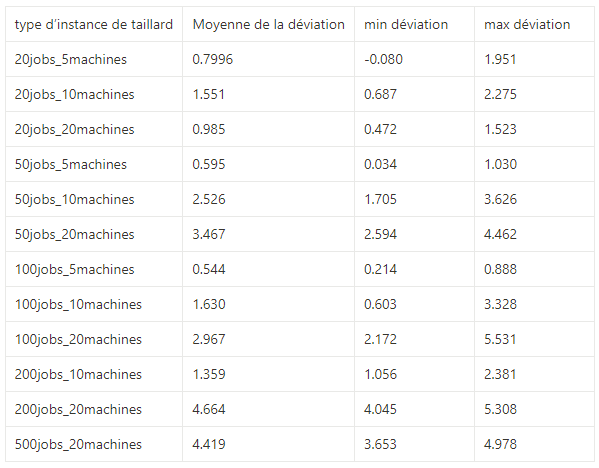

## Conclusion
Après avoir fait les 120 tests, On remarque que la recherche tabou améliore notre solution initiale et donne de très bonne résultat parfois même en dessous du upperbound<br>
Néanmoins, Le nombre d'itération a un grand effet comme on peut le constater, en le diminuant la solution peut ne pas s'améliorer.<br>
Tabu liste elle aussi joue un role très important plus elle diminue plus on risuqe de tomber sur les même solution.<br>
Et la compexcité du problème aussi joue un role sur les résultat.<br>
On constate que plus le problème est complexe plus la recherche nécissite plus de temps/ressource et d'iteration pour avoir un assez bon effet.